**Binary Prediction with a Rainfall Dataset**

**Dataset Description**
The dataset for this competition (both train and test) was generated from a deep learning model trained on the Rainfall Prediction using Machine Learning dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Kaggle: https://www.kaggle.com/competitions/playground-series-s5e3/data


# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset



In [2]:
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")"""

'\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\ntrain = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")\ntest = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")'

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [5]:
test.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

In [6]:
train.shape, test.shape

((2190, 13), (730, 12))

# Sanity Check/ Basic Validation

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.6 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [9]:
train.describe().T

count         mean         std    min       25%      50%  \
id             2190.0  1094.500000  632.342866    0.0   547.250  1094.50   
day            2190.0   179.948402  105.203592    1.0    89.000   178.50   
pressure       2190.0  1013.602146    5.655366  999.0  1008.600  1013.00   
maxtemp        2190.0    26.365799    5.654330   10.4    21.300    27.80   
temparature    2190.0    23.953059    5.222410    7.4    19.300    25.50   
mintemp        2190.0    22.170091    5.059120    4.0    17.700    23.85   
dewpoint       2190.0    20.454566    5.288406   -0.3    16.800    22.15   
humidity       2190.0    82.036530    7.800654   39.0    77.000    82.00   
cloud          2190.0    75.721918   18.026498    2.0    69.000    83.00   
sunshine       2190.0     3.744429    3.626327    0.0     0.400     2.40   
winddirection  2190.0   104.863151   80.002416   10.0    40.000    70.00   
windspeed      2190.0    21.804703    9.898659    4.4    14.125    20.50   
rainfall       2190.0     0.753425    0.431116    0.0     1.000     1.00   

                    75%     max  
id             1641.750  2189.0  
day             270.000   365.0  
pressure       1017.775  1034.6  
maxtemp          31.200    36.0  
temparature      28.400    31.5  
mintemp          26.400    29.8  
dewpoint         25.000    26.7  
humidity         88.000    98.0  
cloud            88.000   100.0  
sunshine          6.800    12.1  
winddirection   200.000   300.0  
windspeed        27.900    59.5  
rainfall          1.000     1.0

In [10]:
test.describe().T

count         mean         std     min       25%      50%  \
id             730.0  2554.500000  210.877136  2190.0  2372.250  2554.50   
day            730.0   183.000000  105.438271     1.0    92.000   183.00   
pressure       730.0  1013.503014    5.505871  1000.0  1008.725  1012.70   
maxtemp        730.0    26.372466    5.672521     7.4    21.600    27.80   
temparature    730.0    23.963288    5.278098     5.9    19.825    25.65   
mintemp        730.0    22.110274    5.170744     4.2    17.825    23.90   
dewpoint       730.0    20.460137    5.391169    -0.0    16.800    22.30   
humidity       730.0    82.669863    7.818714    39.0    77.250    82.00   
cloud          730.0    76.360274   17.934121     0.0    69.000    83.00   
sunshine       730.0     3.664384    3.639272     0.0     0.325     2.20   
winddirection  729.0   103.923182   81.695458    10.0    40.000    70.00   
windspeed      730.0    22.484247    9.954779     4.5    14.500    21.30   

                    75%     max  
id             2736.750  2919.0  
day             274.000   365.0  
pressure       1017.600  1032.2  
maxtemp          31.000    35.8  
temparature      28.375    31.8  
mintemp          26.400    29.1  
dewpoint         25.000    26.7  
humidity         89.000    98.0  
cloud            88.000   100.0  
sunshine          6.675    11.8  
winddirection   200.000   300.0  
windspeed        28.400    59.5

In [11]:
train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [12]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

In [13]:
test.isna().sum()[test.isna().sum()>0]

winddirection    1
dtype: int64

In [14]:
train.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object

In [15]:
test.dtypes

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [16]:
train = train.drop(columns='id', axis=1)
train.shape, train.head()

((2190, 12),
    day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
 0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
 1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
 2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
 3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
 4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   
 
    sunshine  winddirection  windspeed  rainfall  
 0       1.1           60.0       17.2         1  
 1       0.0           50.0       21.9         1  
 2       8.3           70.0       18.1         1  
 3       0.0           60.0       35.6         1  
 4       3.6           40.0       24.8         0  )

In [17]:
test = test.drop(columns = 'id', axis=1)
test.shape, test.head()

((730, 11),
    day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
 0    1    1019.5     17.5         15.8     12.7      14.9      96.0   99.0   
 1    2    1016.5     17.5         16.5     15.8      15.1      97.0   99.0   
 2    3    1023.9     11.2         10.4      9.4       8.9      86.0   96.0   
 3    4    1022.9     20.6         17.3     15.2       9.5      75.0   45.0   
 4    5    1022.2     16.1         13.8      6.4       4.3      68.0   49.0   
 
    sunshine  winddirection  windspeed  
 0       0.0           50.0       24.3  
 1       0.0           50.0       35.3  
 2       0.0           40.0       16.9  
 3       7.1           20.0       50.6  
 4       9.2           20.0       19.4  )

# Handling missing value

In [18]:
train.nunique()

day              365
pressure         236
maxtemp          219
temparature      198
mintemp          199
dewpoint         218
humidity          49
cloud             78
sunshine         120
winddirection     35
windspeed        223
rainfall           2
dtype: int64

In [19]:
for col in train.columns:
  val = train[col].unique().tolist()
  print(col)
  print(sorted(val))
  print('*'*30)

day
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [20]:
for col in test.columns:
  val = test[col].unique().tolist()
  print(col)
  print(sorted(val))
  print('*'*30)

day
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

'nan' value is found in winddirection

In [21]:
test[test['winddirection'].isna()]

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
517  153    1007.8     32.9         30.6     28.9      22.0      65.0   75.0   

     sunshine  winddirection  windspeed  
517       8.2            NaN       17.2

In [22]:
test['winddirection'].mean(), test['winddirection'].median(), test['winddirection'].nunique()

(103.92318244170096, 70.0, 29)

In [23]:
test['winddirection'].unique()


array([ 50.,  40.,  20.,  70.,  10.,  60.,  30.,  80., 210., 200., 220.,
       230., 300., 140., 190., 180., 120., 270., 250., 240., 260., 160.,
       130., 110., 100.,  90.,  nan, 290., 280., 170.])

In [24]:
test.dtypes

day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
dtype: object

In [25]:
test.corr()['winddirection']

day              0.010907
pressure        -0.620377
maxtemp          0.635287
temparature      0.642149
mintemp          0.643158
dewpoint         0.618630
humidity        -0.003246
cloud           -0.118833
sunshine         0.248533
winddirection    1.000000
windspeed       -0.139357
Name: winddirection, dtype: float64

In [26]:
test.groupby('dewpoint')['winddirection'].mean()

dewpoint
-0.0      60.000000
 0.3      60.000000
 2.3      40.000000
 2.4      20.000000
 3.1      23.333333
            ...    
 26.3    198.750000
 26.4    232.857143
 26.5    220.000000
 26.6    230.000000
 26.7    220.000000
Name: winddirection, Length: 172, dtype: float64

In [27]:
dewpoint_grouped = test.groupby('dewpoint')['winddirection'].median()

In [28]:
target_dewpoint = 22.0
if target_dewpoint in dewpoint_grouped.index:
  print (dewpoint_grouped[target_dewpoint])
else:
  print ("Not matched")


50.0


In [29]:
temp_grouped = test.groupby('temparature')['winddirection'].median()
temp_grouped

temparature
5.9      10.0
8.5      20.0
10.4     30.0
11.8     20.0
11.9     70.0
        ...  
31.1    115.0
31.4    115.0
31.6    270.0
31.7    280.0
31.8    240.0
Name: winddirection, Length: 175, dtype: float64

In [30]:
target_temp = 30.6
if target_temp in temp_grouped.index:
  print (temp_grouped[target_temp])
else:
  print ("Not matched")


205.0


In [31]:
test[test['winddirection'].isna()]

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
517  153    1007.8     32.9         30.6     28.9      22.0      65.0   75.0   

     sunshine  winddirection  windspeed  
517       8.2            NaN       17.2

In [32]:
#test['winddirection'] = test['winddirection'].fillna(test['dewpoint'].map(dewpoint_grouped))
test['winddirection'] = test['winddirection'].fillna(103.0)


In [33]:
test.iloc[517]

day               153.0
pressure         1007.8
maxtemp            32.9
temparature        30.6
mintemp            28.9
dewpoint           22.0
humidity           65.0
cloud              75.0
sunshine            8.2
winddirection     103.0
windspeed          17.2
Name: 517, dtype: float64

In [34]:
test.isna().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

# Handling outliers

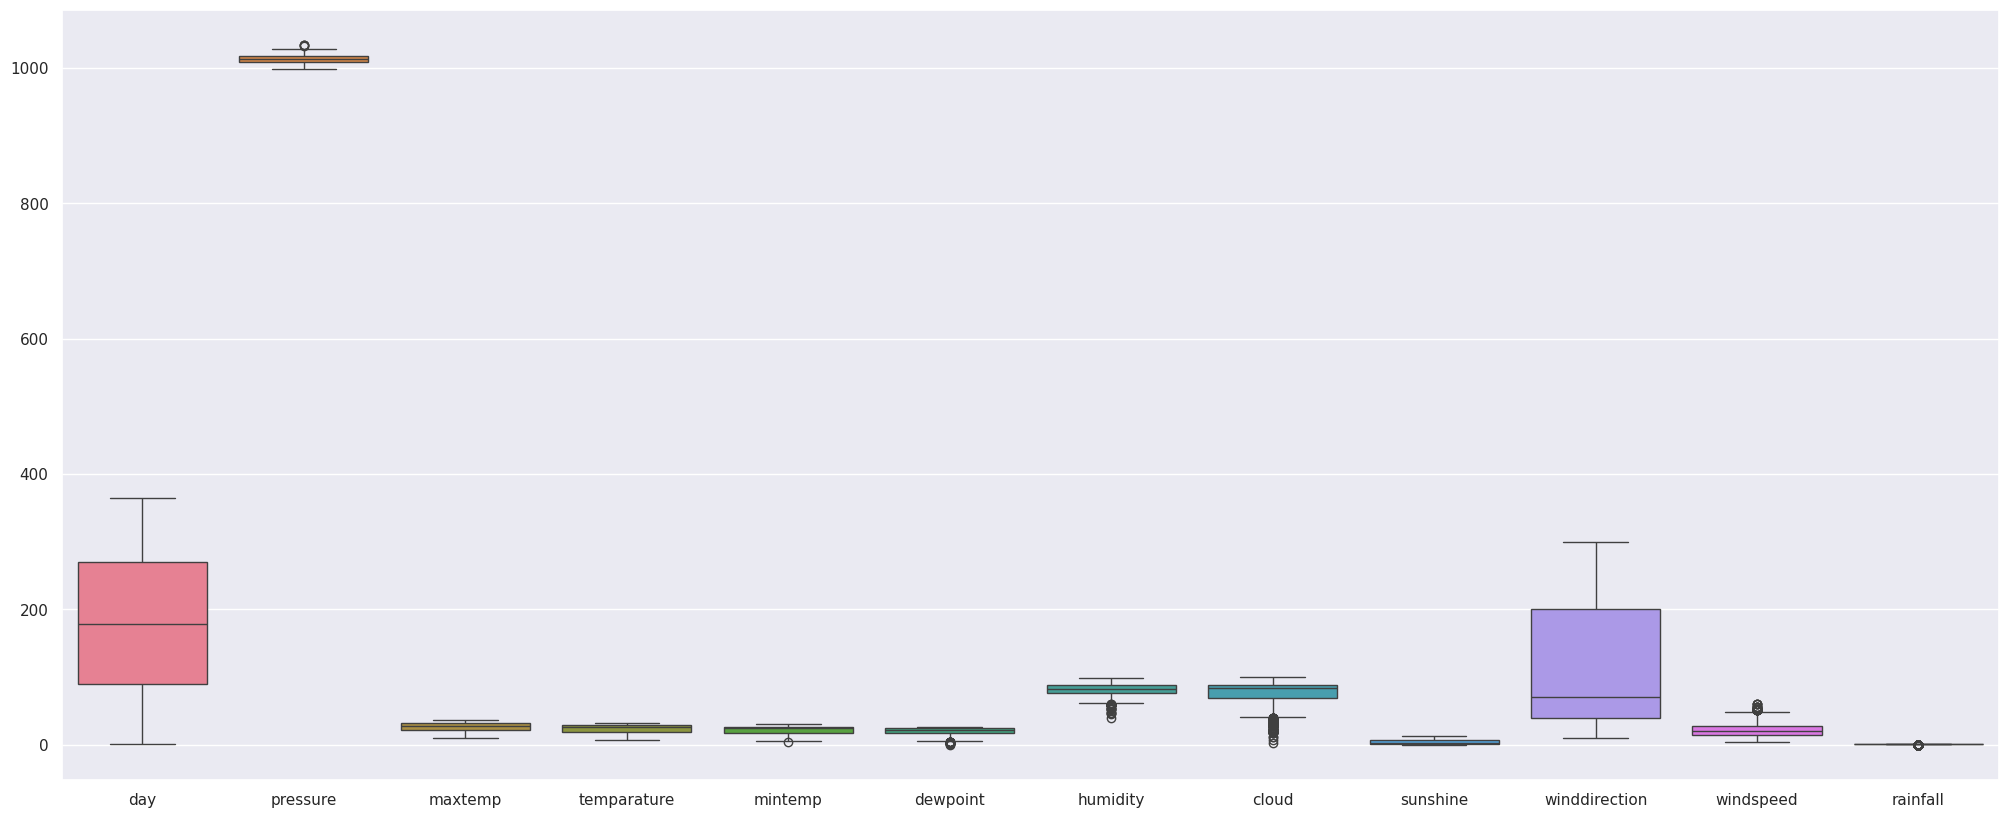

In [35]:
plt.figure(figsize=(25,10))
sns.boxplot(train)
plt.show()

In [36]:
def box_dist_plot(df, col):
  plt.figure(figsize=(14,8))
  plt.subplot(1,2,1)
  sns.boxplot(df[col])

  plt.subplot(1,2,2)
  sns.distplot(df[col], kde=True)
  plt.title(col)
  plt.show()


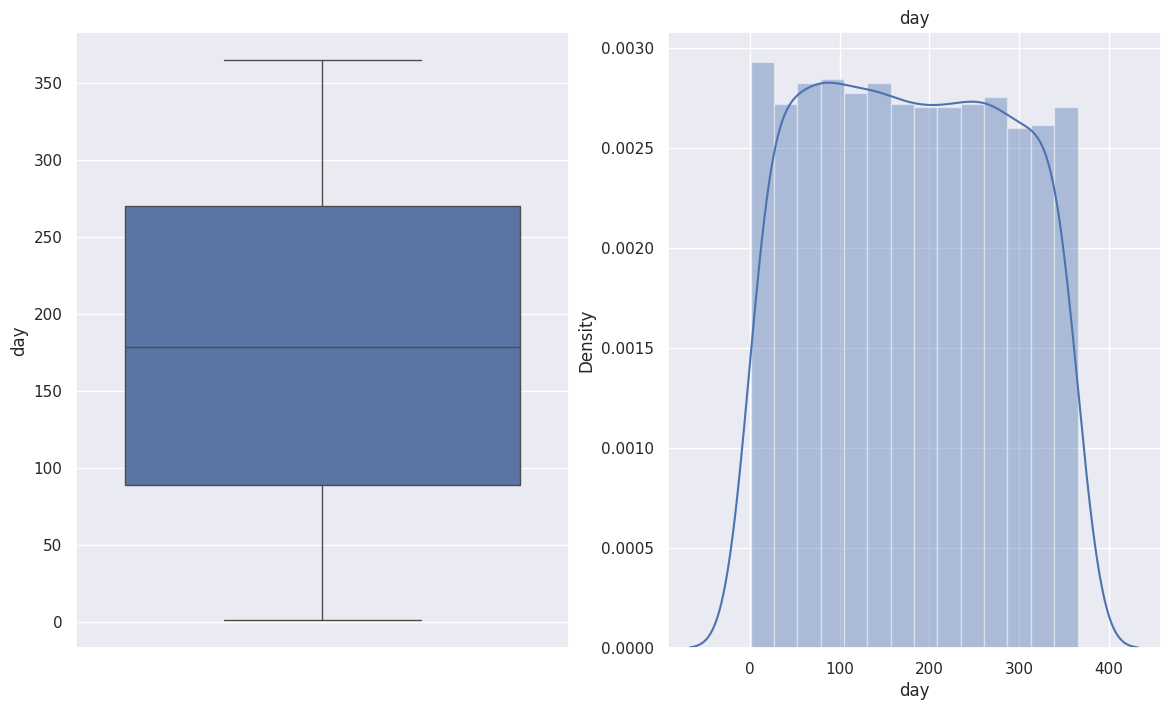

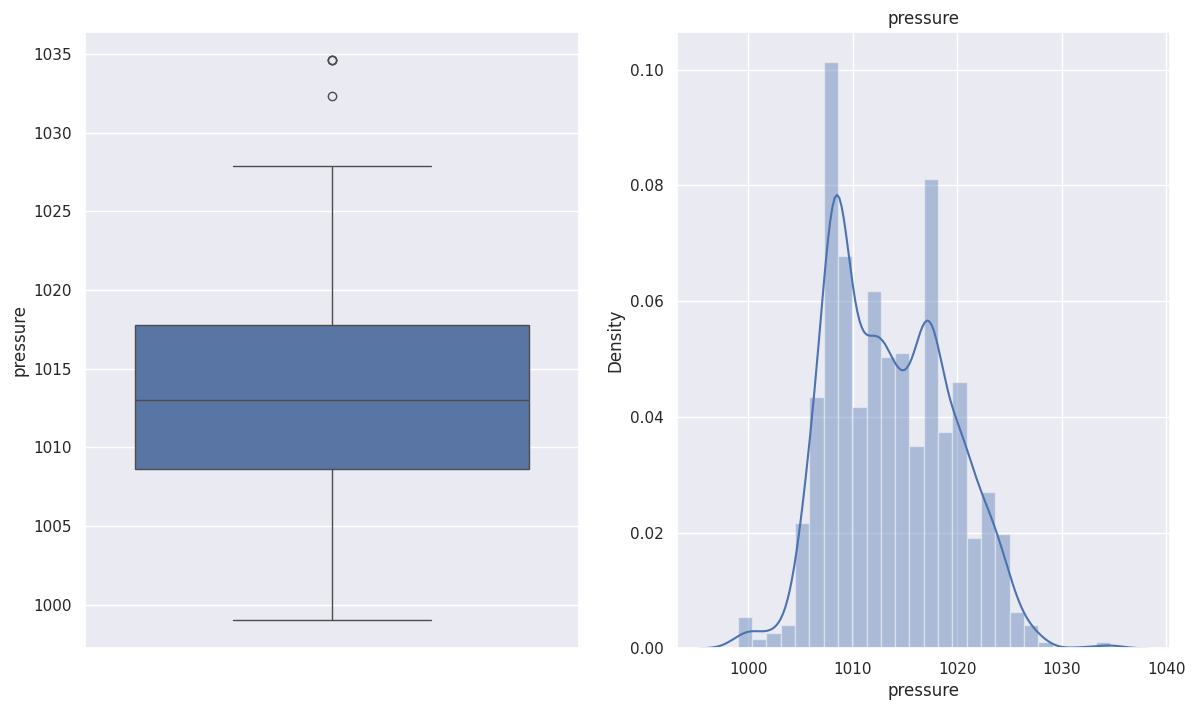

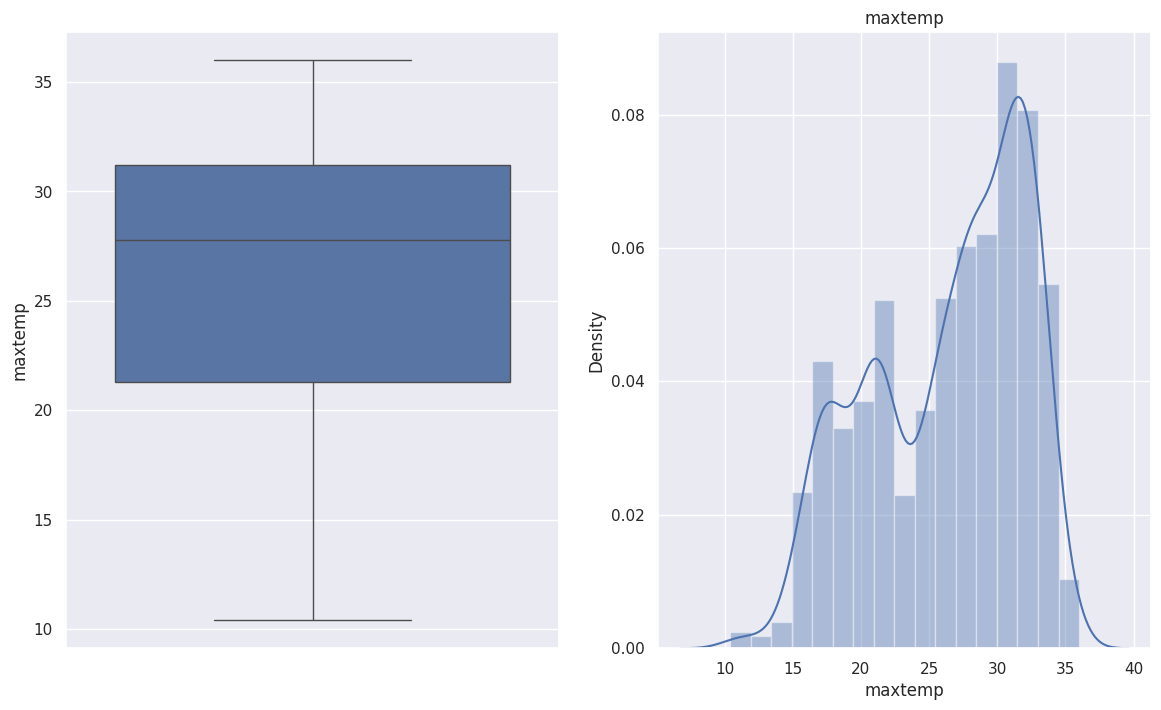

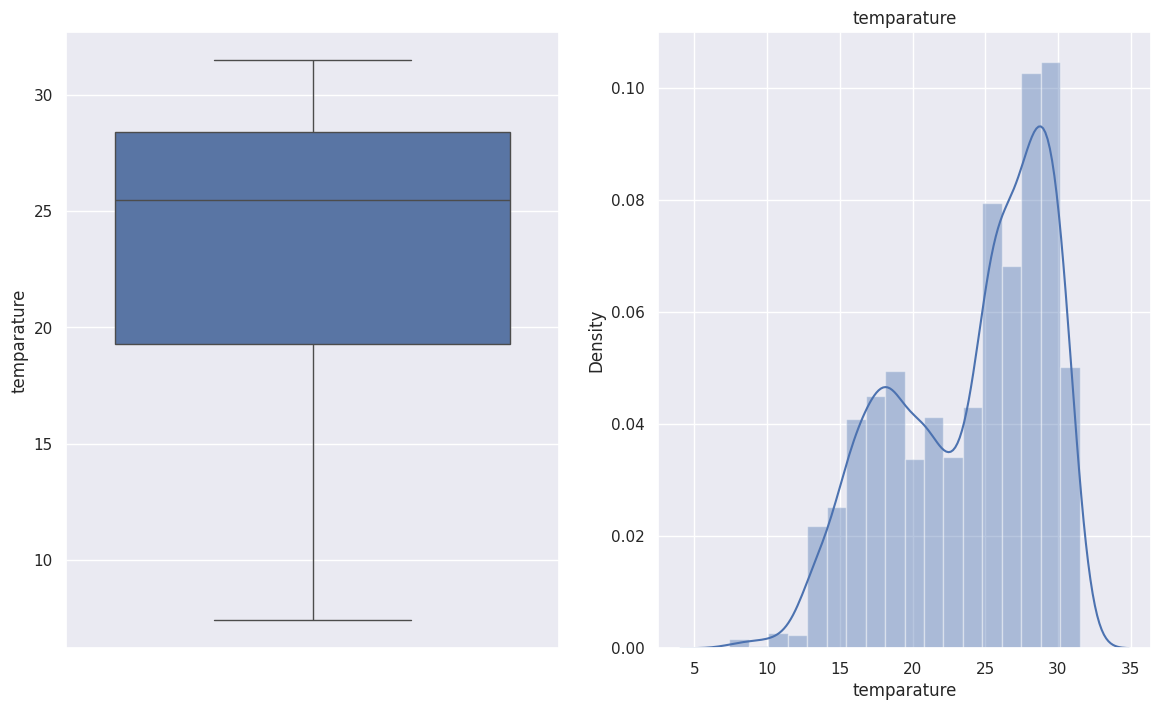

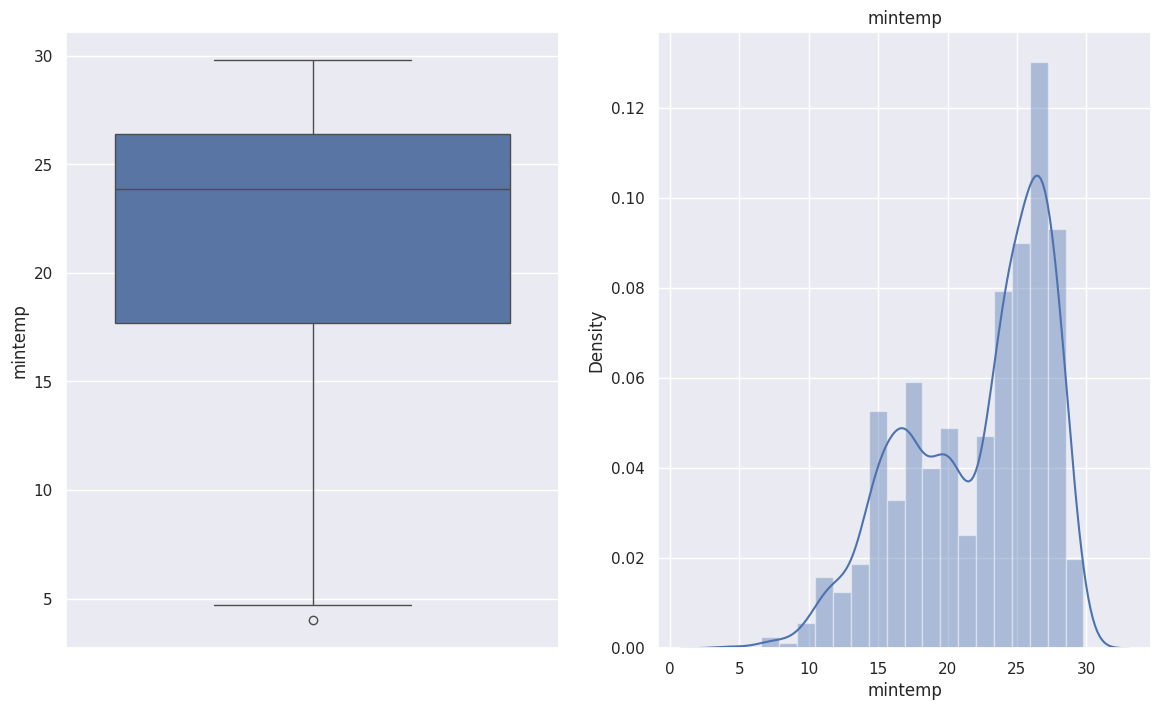

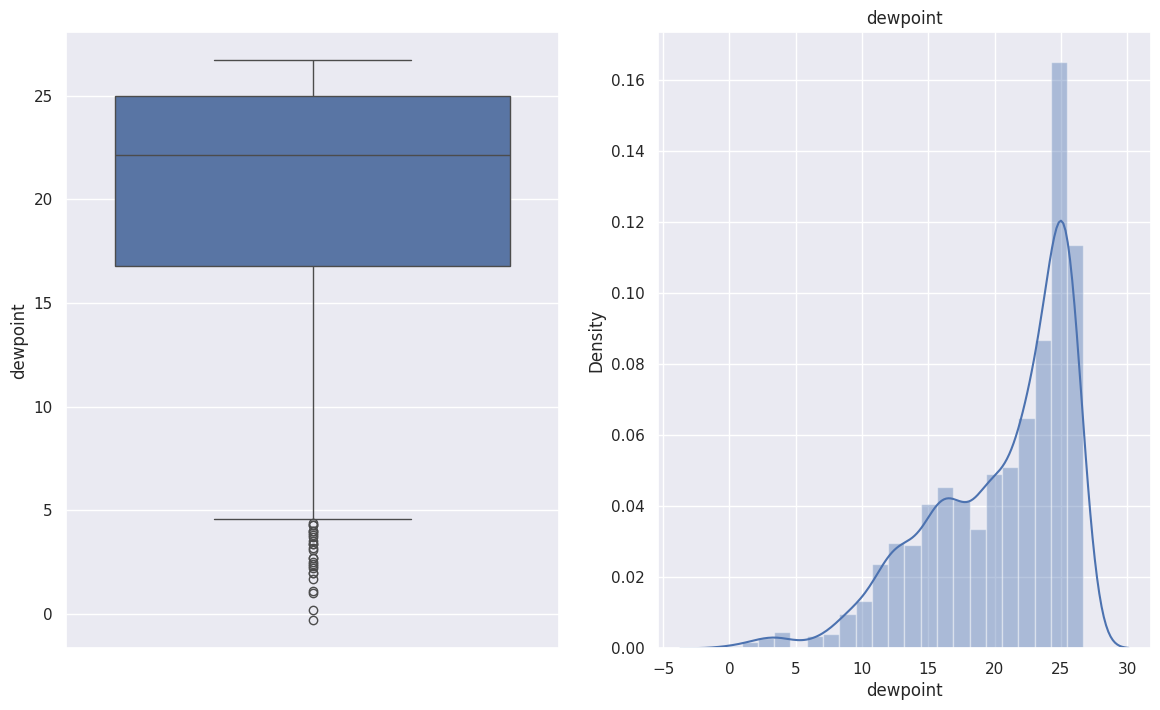

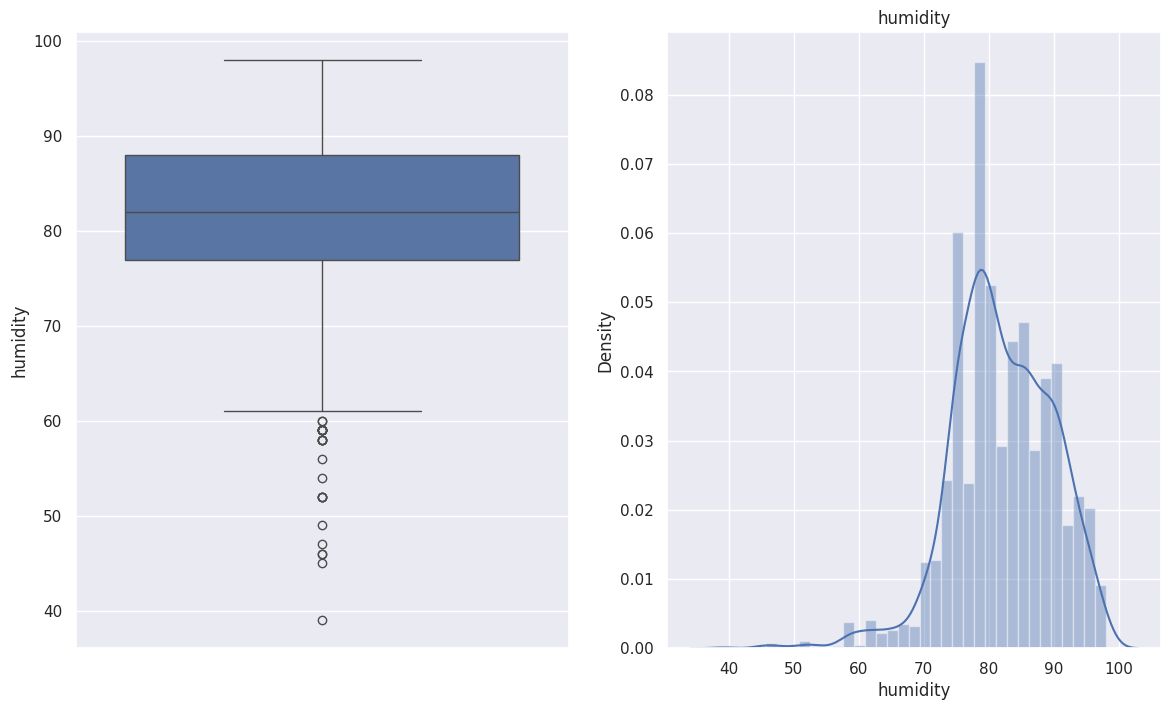

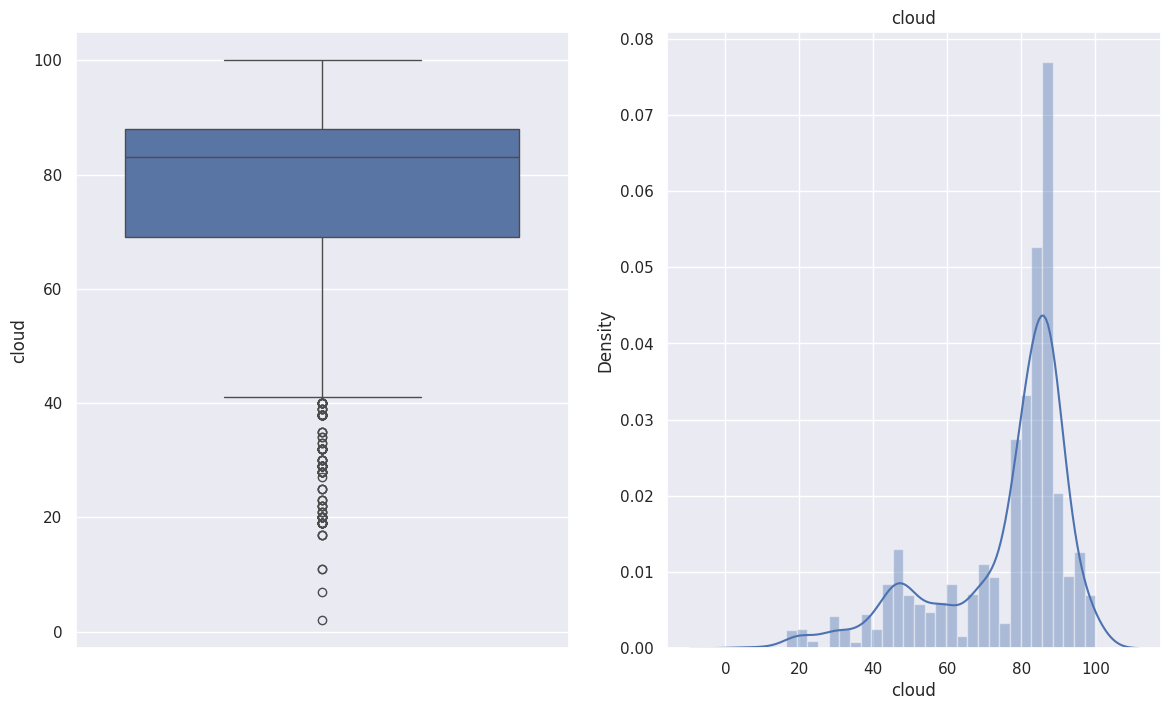

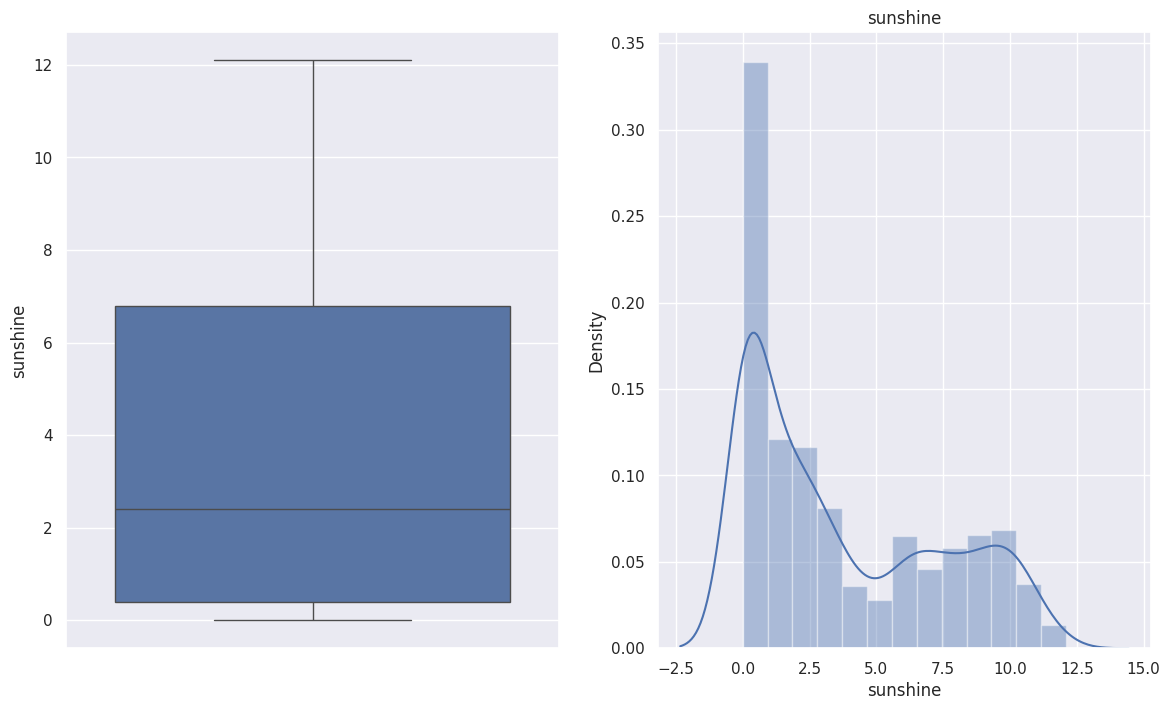

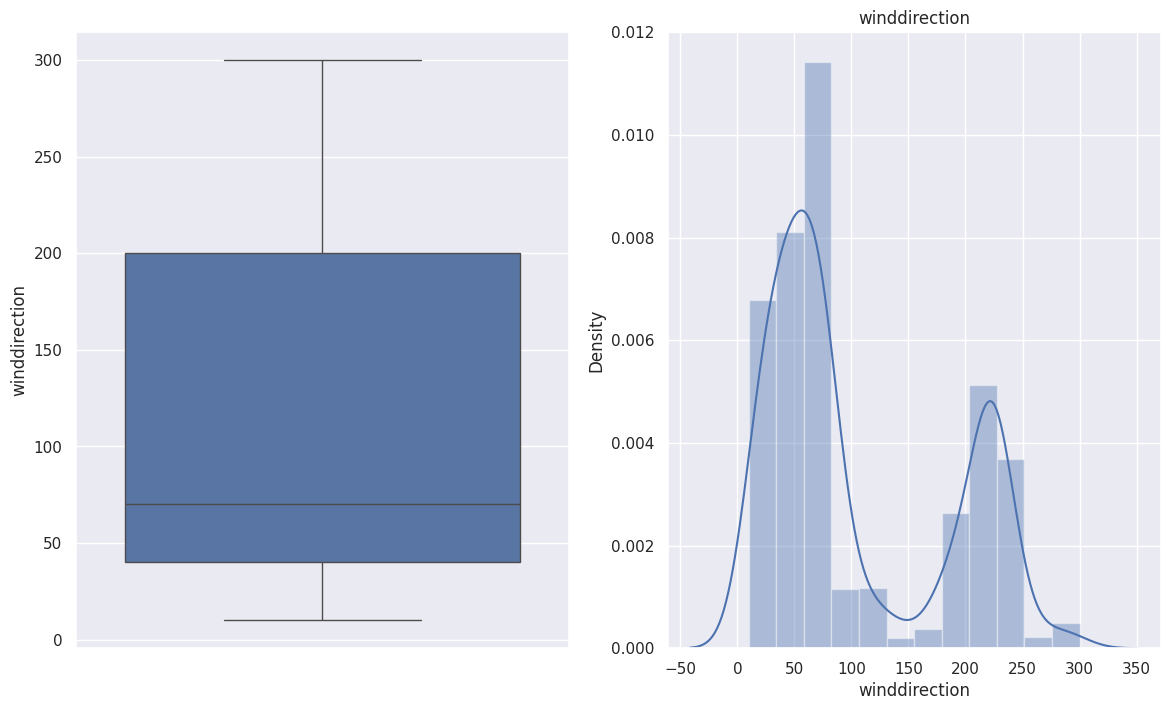

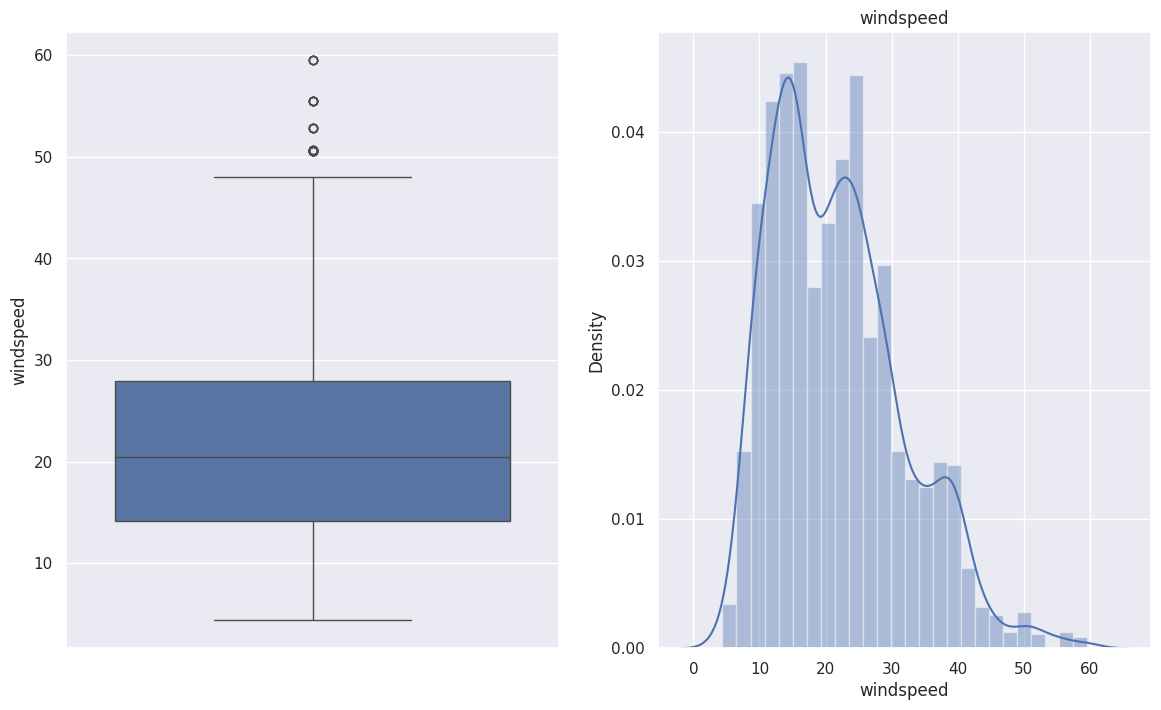

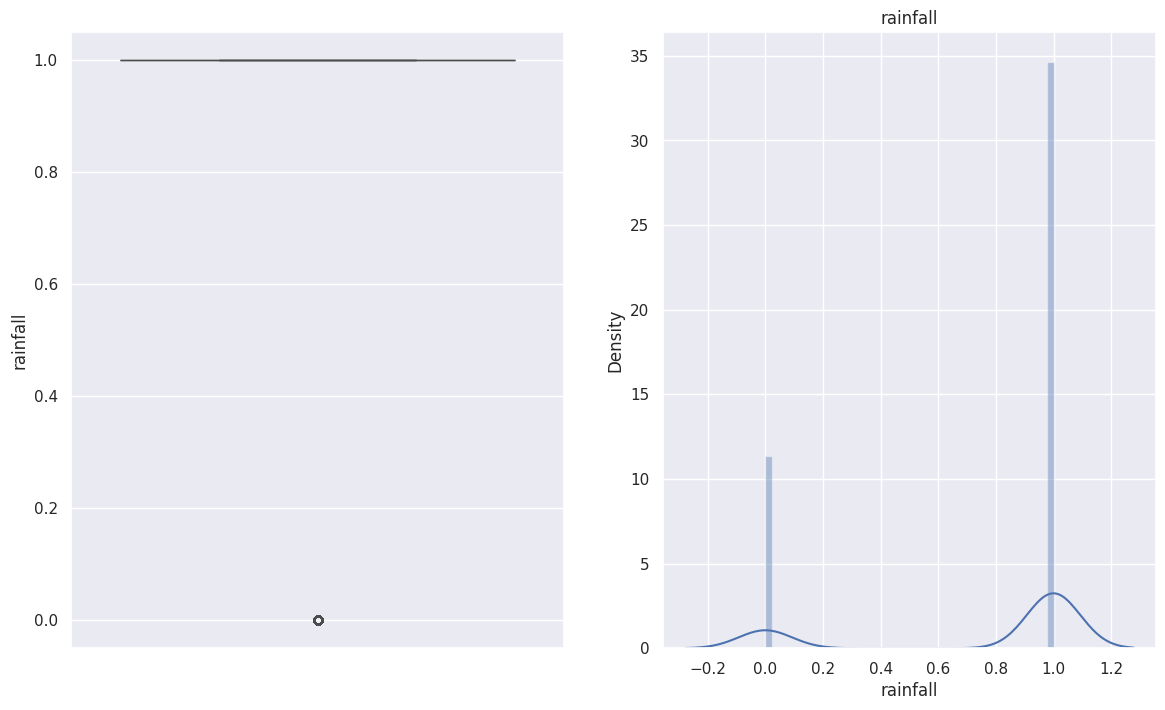

In [37]:
for col in train.columns:
  box_dist_plot(train, col)

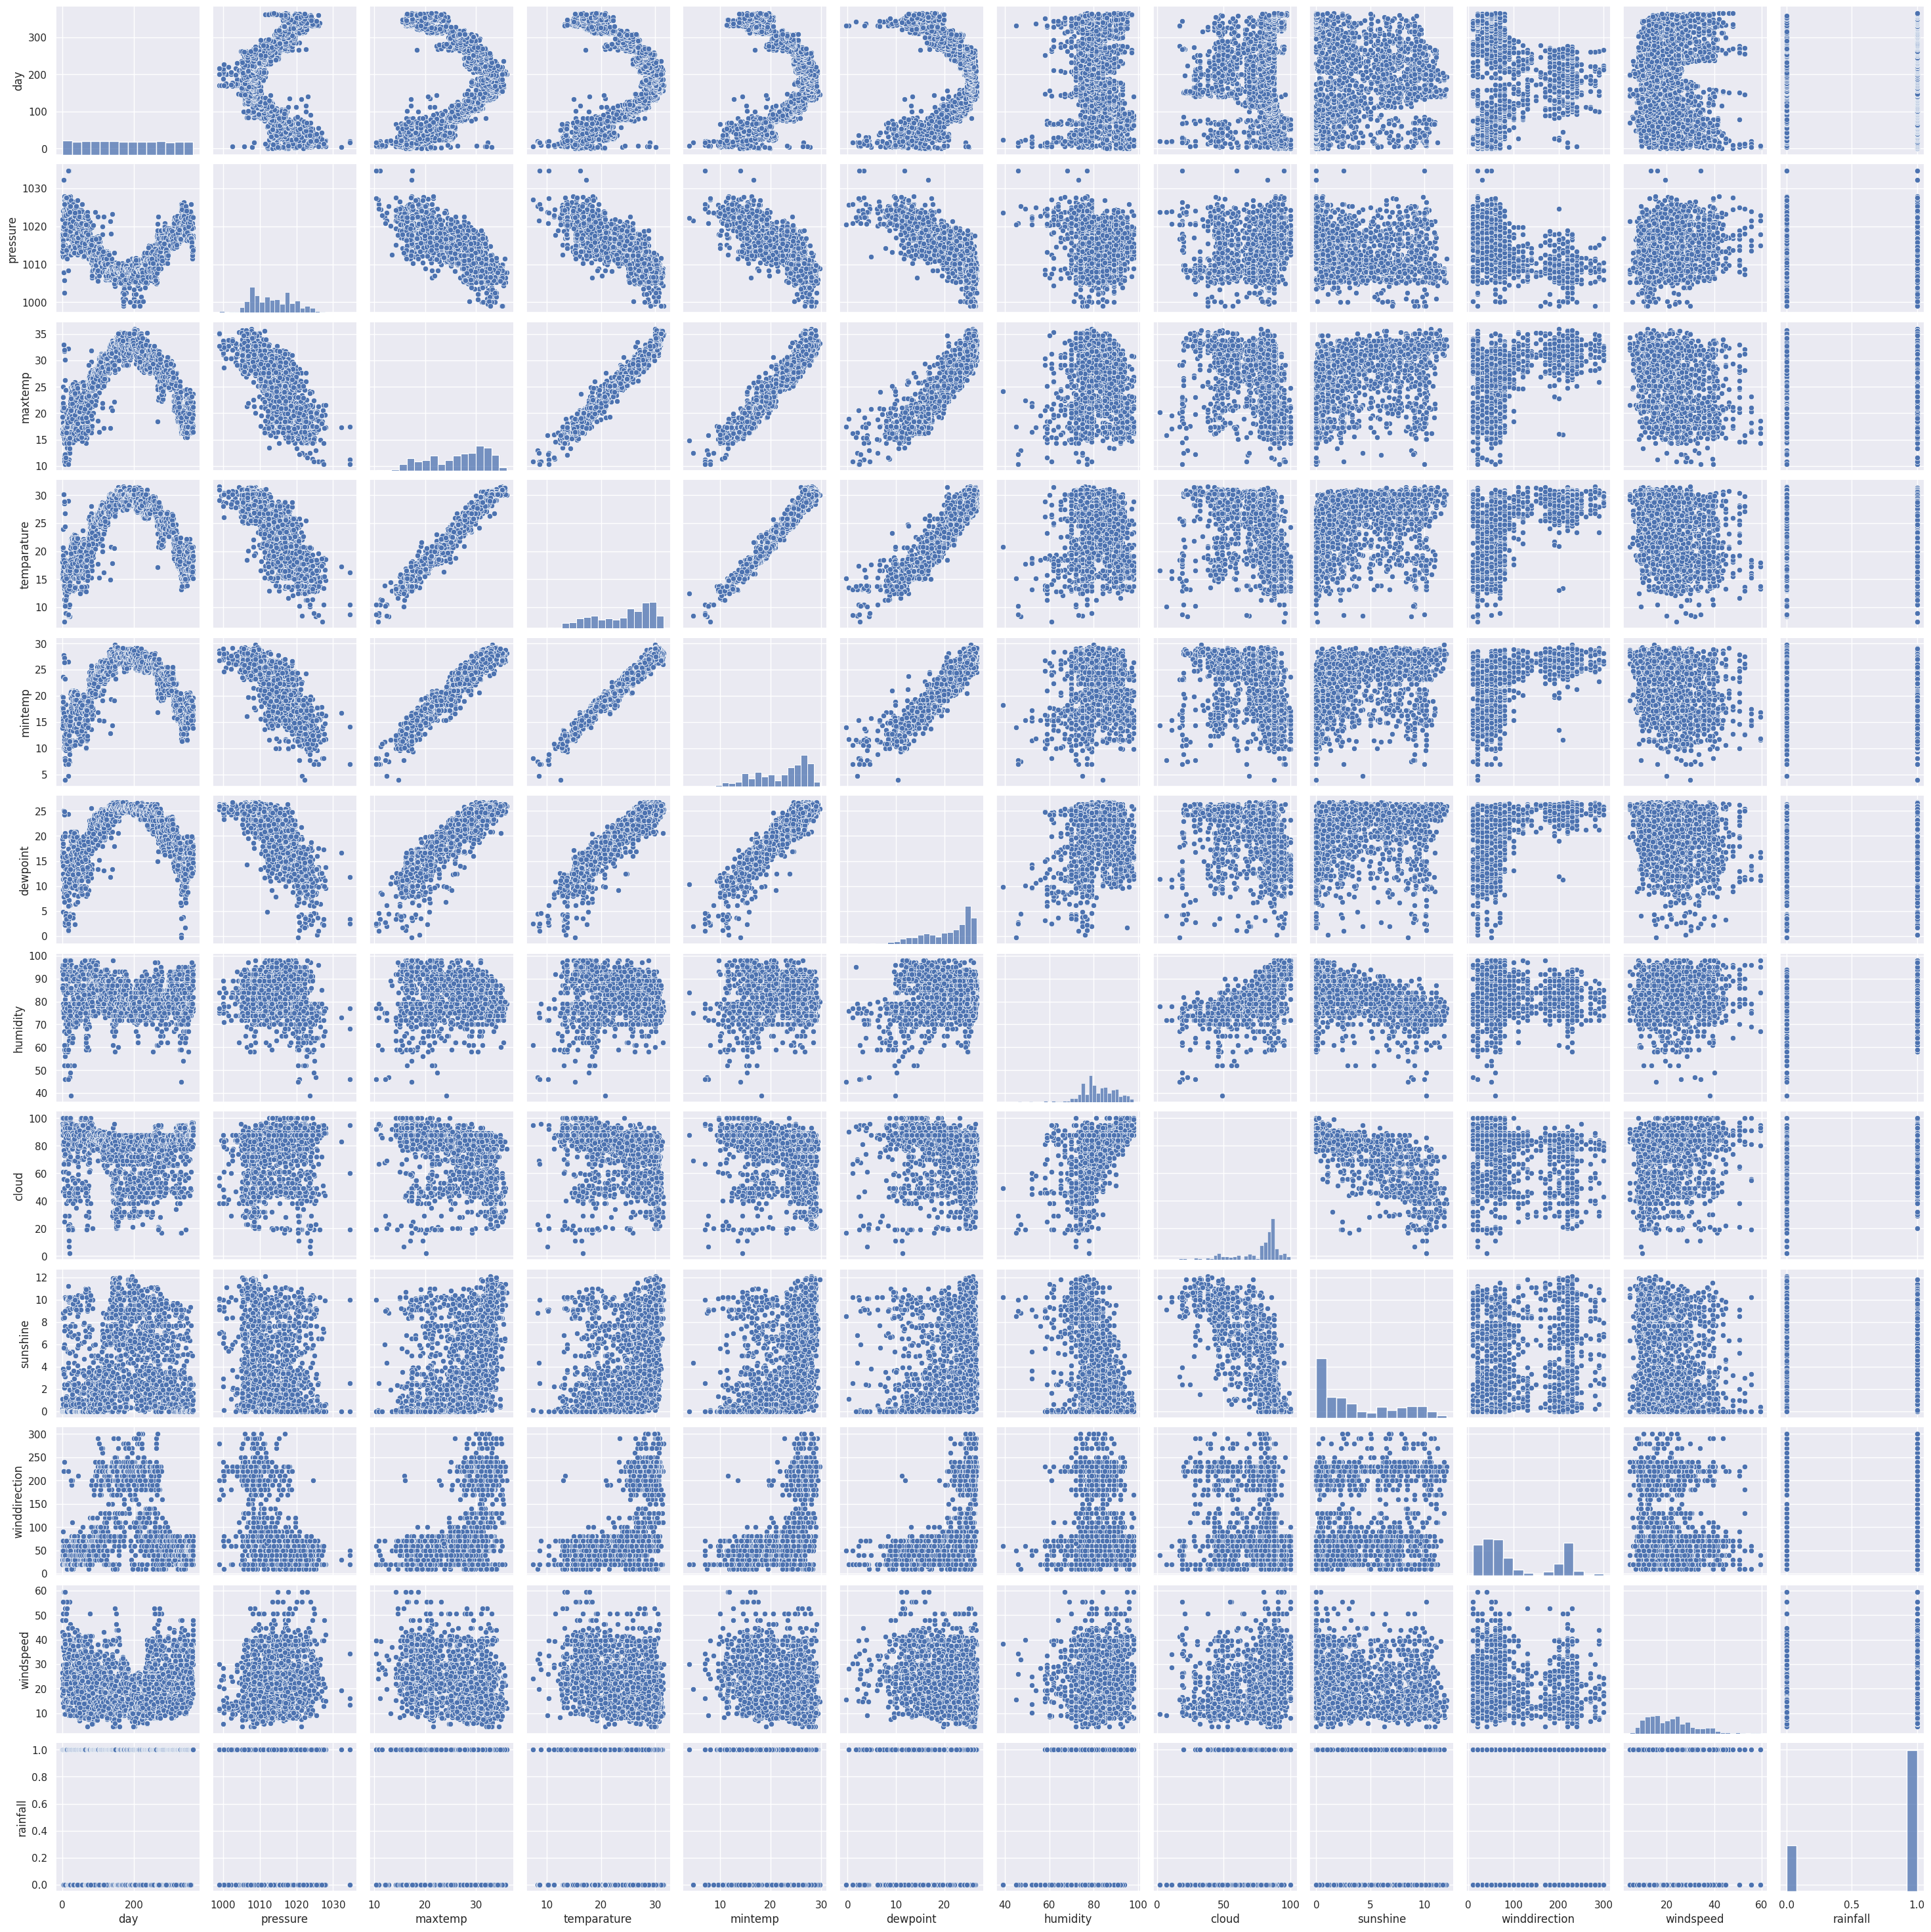

In [38]:
sns.pairplot(train)

# Check if the y value is balanced

In [39]:
train['rainfall'].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [40]:
train['rainfall'].value_counts(normalize=True)

rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64

# Split the data into X and y

In [41]:
X = train.drop(columns='rainfall', axis=1)
y = train[['rainfall']]

In [42]:
X.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1    2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2    3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3    4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4    5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   

   sunshine  winddirection  windspeed  
0       1.1           60.0       17.2  
1       0.0           50.0       21.9  
2       8.3           70.0       18.1  
3       0.0           60.0       35.6  
4       3.6           40.0       24.8

In [43]:
y.head()

rainfall
0         1
1         1
2         1
3         1
4         0

# Split the data into train and test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [46]:
y_train.value_counts(), y_test.value_counts()

(rainfall
 1           1320
 0            432
 Name: count, dtype: int64,
 rainfall
 1           330
 0           108
 Name: count, dtype: int64)

In [47]:
X_train.shape

(1752, 11)

In [48]:
X_train.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
919  190    1009.6     30.7         29.0     27.7      25.3      82.0   79.0   
118  119    1013.5     27.3         25.5     23.3      20.6      73.0   64.0   
784   55    1020.4     17.1         15.5     14.8       8.2      79.0   79.0   
719  355    1016.7     19.6         18.9     17.2      16.5      83.0   81.0   
327  328    1017.1     24.5         18.4     17.2      16.0      65.0   60.0   

     sunshine  winddirection  windspeed  
919       0.3           70.0       24.4  
118       6.3          120.0       29.6  
784       0.2           20.0       23.3  
719       0.6           80.0       38.3  
327       6.8           60.0       35.3

# Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
pd.DataFrame(X_train_scaled).head()

0         1         2         3         4         5         6   \
0  0.102007 -0.732438  0.783223  0.982785  1.111503  0.933388 -0.008190   
1 -0.567274 -0.038838  0.181929  0.314013  0.243197  0.049231 -1.151077   
2 -1.170569  1.188302 -1.621953 -1.596764 -1.434212 -2.283438 -0.389153   
3  1.657378  0.530270 -1.179825 -0.947100 -0.960590 -0.722055  0.118797   
4  1.402863  0.601409 -0.313255 -1.042639 -0.960590 -0.816114 -2.166977   

         7         8         9         10  
0  0.182840 -0.937409 -0.423189  0.255314  
1 -0.640785  0.714845  0.203278  0.780256  
2  0.182840 -0.964946 -1.049657  0.144269  
3  0.292656 -0.854796 -0.297896  1.658523  
4 -0.860418  0.852533 -0.548483  1.355672

# Building Model

In [53]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [54]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, log_loss,
    matthews_corrcoef, cohen_kappa_score, brier_score_loss,
    confusion_matrix, classification_report, roc_curve
)


In [55]:
overall_result = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'log_loss', 'matthews_corrcoef', 'cohen_kappa', 'brier_score'])

def evaluate_model(model, y_train, y_train_pred, y_proba=None):
    results = {
      'model': model,
      'accuracy': accuracy_score(y_train, y_train_pred),
      'precision': precision_score(y_train, y_train_pred),
      'recall': recall_score(y_train, y_train_pred),
      'f1': f1_score(y_train, y_train_pred),
      'roc_auc': roc_auc_score(y_train, y_train_pred),
      'log_loss': log_loss(y_train, y_train_pred),
      'matthews_corrcoef': matthews_corrcoef(y_train, y_train_pred),
      'cohen_kappa': cohen_kappa_score(y_train, y_train_pred),
      'brier_score': brier_score_loss(y_train, y_proba)}

    # Calculate PR AUC
    precision, recall, _ = precision_recall_curve(y_train, y_proba)
    results['pr_auc'] = auc(recall, precision)
    return results


## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
def logisticRegModel(X_train, y_train, X_test, y_test):
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  y_train_pred = lr.predict(X_train)
  y_test_pred = lr.predict(X_test)
  y_train_proba = lr.predict_proba(X_train)[:,1]
  y_test_proba = lr.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [58]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = logisticRegModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [59]:
lr_train_results = evaluate_model('LogisticRegression-Train', y_train, y_train_pred, y_train_proba)
lr_test_results = evaluate_model('LogisticRegression-Test', y_test, y_test_pred, y_test_proba)

In [60]:
lr_train_results

{'model': 'LogisticRegression-Train',
 'accuracy': 0.8670091324200914,
 'precision': 0.8890479599141017,
 'recall': 0.9409090909090909,
 'f1': 0.9142436510857563,
 'roc_auc': 0.7910563973063973,
 'log_loss': 4.793476734968206,
 'matthews_corrcoef': 0.6241997701943577,
 'cohen_kappa': 0.6192384320924089,
 'brier_score': 0.09896173355661599,
 'pr_auc': 0.9610057144005927}

In [61]:
lr_test_results

{'model': 'LogisticRegression-Test',
 'accuracy': 0.865296803652968,
 'precision': 0.8838526912181303,
 'recall': 0.9454545454545454,
 'f1': 0.9136163982430454,
 'roc_auc': 0.7829124579124578,
 'log_loss': 4.855195319538612,
 'matthews_corrcoef': 0.6166718152547216,
 'cohen_kappa': 0.6094840874059297,
 'brier_score': 0.10481342419515195,
 'pr_auc': 0.9477040154333736}

In [62]:
overall_result = pd.concat([overall_result, pd.DataFrame([lr_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([lr_test_results])], ignore_index=True)

In [63]:
overall_result

model  accuracy  precision    recall        f1  \
0  LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1   LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   

    roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
0  0.791056  4.793477           0.624200     0.619238     0.098962  0.961006  
1  0.782912  4.855195           0.616672     0.609484     0.104813  0.947704

## DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
def decisionTreeModel(X_train, y_train, X_test, y_test):
  dt = DecisionTreeClassifier()
  dt.fit(X_train, y_train)
  y_train_pred = dt.predict(X_train)
  y_test_pred = dt.predict(X_test)
  y_train_proba = dt.predict_proba(X_train)[:,1]
  y_test_proba = dt.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [66]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = decisionTreeModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [67]:
dt_train_results = evaluate_model('DecisionTreeClassifier-Train',y_train, y_train_pred, y_train_proba)
dt_test_results = evaluate_model('DecisionTreeClassifier-Test',y_test, y_test_pred, y_test_proba)

In [68]:
dt_train_results

{'model': 'DecisionTreeClassifier-Train',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0,
 'log_loss': 2.2204460492503136e-16,
 'matthews_corrcoef': 1.0,
 'cohen_kappa': 1.0,
 'brier_score': 0.0,
 'pr_auc': 1.0}

In [69]:
dt_test_results

{'model': 'DecisionTreeClassifier-Test',
 'accuracy': 0.7899543378995434,
 'precision': 0.8562874251497006,
 'recall': 0.8666666666666667,
 'f1': 0.8614457831325302,
 'roc_auc': 0.7111111111111112,
 'log_loss': 7.57081304063648,
 'matthews_corrcoef': 0.42768107378649894,
 'cohen_kappa': 0.42754858506648485,
 'brier_score': 0.2100456621004566,
 'pr_auc': 0.9117053564104668}

In [70]:
# Training the model with original data
y_train_pred, y_test_pred, y_train_proba, y_test_proba = decisionTreeModel(X_train, y_train, X_test, y_test)

In [71]:
dt_train_results = evaluate_model('DecisionTreeClassifier-Train',y_train, y_train_pred, y_train_proba)
dt_test_results = evaluate_model('DecisionTreeClassifier-Test',y_test, y_test_pred, y_test_proba)

In [72]:
dt_train_results

{'model': 'DecisionTreeClassifier-Train',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0,
 'log_loss': 2.2204460492503136e-16,
 'matthews_corrcoef': 1.0,
 'cohen_kappa': 1.0,
 'brier_score': 0.0,
 'pr_auc': 1.0}

In [73]:
dt_test_results

{'model': 'DecisionTreeClassifier-Test',
 'accuracy': 0.8036529680365296,
 'precision': 0.8674698795180723,
 'recall': 0.8727272727272727,
 'f1': 0.8700906344410876,
 'roc_auc': 0.7326599326599326,
 'log_loss': 7.077064364073231,
 'matthews_corrcoef': 0.4682722983462913,
 'cohen_kappa': 0.4682364899203795,
 'brier_score': 0.1963470319634703,
 'pr_auc': 0.9180437816021246}

In [74]:
overall_result = pd.concat([overall_result, pd.DataFrame([dt_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([dt_test_results])], ignore_index=True)

In [75]:
overall_result

model  accuracy  precision    recall        f1  \
0      LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1       LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   
2  DecisionTreeClassifier-Train  1.000000   1.000000  1.000000  1.000000   
3   DecisionTreeClassifier-Test  0.803653   0.867470  0.872727  0.870091   

    roc_auc      log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
0  0.791056  4.793477e+00           0.624200     0.619238     0.098962   
1  0.782912  4.855195e+00           0.616672     0.609484     0.104813   
2  1.000000  2.220446e-16           1.000000     1.000000     0.000000   
3  0.732660  7.077064e+00           0.468272     0.468236     0.196347   

     pr_auc  
0  0.961006  
1  0.947704  
2  1.000000  
3  0.918044

Decision Tree Regressor Model has overfitting problem

## RandomForestClassifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
def randomForestModel(X_train, y_train, X_test, y_test):
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_train_pred = rf.predict(X_train)
  y_test_pred = rf.predict(X_test)
  y_train_proba = rf.predict_proba(X_train)[:,1]
  y_test_proba = rf.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba


In [78]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = randomForestModel(X_train, y_train, X_test, y_test)

In [79]:
rf_train_results = evaluate_model('RandomForestClassifier-Train',y_train, y_train_pred, y_train_proba)
rf_test_results = evaluate_model('RandomForestClassifier-Test',y_test, y_test_pred, y_test_proba)

In [80]:
rf_train_results

{'model': 'RandomForestClassifier-Train',
 'accuracy': 1.0,
 'precision': 1.0,
 'recall': 1.0,
 'f1': 1.0,
 'roc_auc': 1.0,
 'log_loss': 2.2204460492503136e-16,
 'matthews_corrcoef': 1.0,
 'cohen_kappa': 1.0,
 'brier_score': 0.014872602739726027,
 'pr_auc': 1.0}

In [81]:
rf_test_results

{'model': 'RandomForestClassifier-Test',
 'accuracy': 0.865296803652968,
 'precision': 0.886039886039886,
 'recall': 0.9424242424242424,
 'f1': 0.9133627019089574,
 'roc_auc': 0.7860269360269361,
 'log_loss': 4.855195319538612,
 'matthews_corrcoef': 0.6180058593672173,
 'cohen_kappa': 0.6120868233810681,
 'brier_score': 0.11191849315068493,
 'pr_auc': 0.9494242342528864}

In [82]:
overall_result = pd.concat([overall_result, pd.DataFrame([rf_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([rf_test_results])], ignore_index=True)

In [83]:
overall_result

model  accuracy  precision    recall        f1  \
0      LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1       LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   
2  DecisionTreeClassifier-Train  1.000000   1.000000  1.000000  1.000000   
3   DecisionTreeClassifier-Test  0.803653   0.867470  0.872727  0.870091   
4  RandomForestClassifier-Train  1.000000   1.000000  1.000000  1.000000   
5   RandomForestClassifier-Test  0.865297   0.886040  0.942424  0.913363   

    roc_auc      log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
0  0.791056  4.793477e+00           0.624200     0.619238     0.098962   
1  0.782912  4.855195e+00           0.616672     0.609484     0.104813   
2  1.000000  2.220446e-16           1.000000     1.000000     0.000000   
3  0.732660  7.077064e+00           0.468272     0.468236     0.196347   
4  1.000000  2.220446e-16           1.000000     1.000000     0.014873   
5  0.786027  4.855195e+00           0.618006     0.612087     0.111918   

     pr_auc  
0  0.961006  
1  0.947704  
2  1.000000  
3  0.918044  
4  1.000000  
5  0.949424

## GradientBoostingClassifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
def gradientBoostingModel(X_train, y_train, X_test, y_test):
  gb = GradientBoostingClassifier()
  gb.fit(X_train, y_train)
  y_train_pred = gb.predict(X_train)
  y_test_pred = gb.predict(X_test)
  y_train_proba = gb.predict_proba(X_train)[:,1]
  y_test_proba = gb.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [86]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = gradientBoostingModel(X_train, y_train, X_test, y_test)

In [87]:
gb_train_results = evaluate_model('GradientBoostingClassifier-Train',y_train, y_train_pred, y_train_proba)
gb_test_results = evaluate_model('GradientBoostingClassifier-Test',y_test, y_test_pred, y_test_proba)

In [88]:
overall_result = pd.concat([overall_result, pd.DataFrame([gb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([gb_test_results])], ignore_index=True)

In [89]:
overall_result

model  accuracy  precision    recall        f1  \
0          LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1           LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   
2      DecisionTreeClassifier-Train  1.000000   1.000000  1.000000  1.000000   
3       DecisionTreeClassifier-Test  0.803653   0.867470  0.872727  0.870091   
4      RandomForestClassifier-Train  1.000000   1.000000  1.000000  1.000000   
5       RandomForestClassifier-Test  0.865297   0.886040  0.942424  0.913363   
6  GradientBoostingClassifier-Train  0.917808   0.925470  0.968939  0.946706   
7   GradientBoostingClassifier-Test  0.869863   0.888889  0.945455  0.916300   

    roc_auc      log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
0  0.791056  4.793477e+00           0.624200     0.619238     0.098962   
1  0.782912  4.855195e+00           0.616672     0.609484     0.104813   
2  1.000000  2.220446e-16           1.000000     1.000000     0.000000   
3  0.732660  7.077064e+00           0.468272     0.468236     0.196347   
4  1.000000  2.220446e-16           1.000000     1.000000     0.014873   
5  0.786027  4.855195e+00           0.618006     0.612087     0.111918   
6  0.865257  2.962492e+00           0.771440     0.767567     0.061940   
7  0.792172  4.690612e+00           0.631283     0.625236     0.109479   

     pr_auc  
0  0.961006  
1  0.947704  
2  1.000000  
3  0.918044  
4  1.000000  
5  0.949424  
6  0.986692  
7  0.941494

## XGBClassifier

In [90]:
pip install xgboost

In [91]:
from xgboost import XGBClassifier

In [92]:
def xgboostModel(X_train, y_train, X_test, y_test):
  xgb = XGBClassifier()
  xgb.fit(X_train, y_train)
  y_train_pred = xgb.predict(X_train)
  y_test_pred = xgb.predict(X_test)
  y_train_proba = xgb.predict_proba(X_train)[:,1]
  y_test_proba = xgb.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [93]:
xgb_train_results = evaluate_model('XGBClassifier-Train',y_train, y_train_pred, y_train_proba)
xgb_test_results = evaluate_model('XGBClassifier-Test',y_test, y_test_pred, y_test_proba)

In [94]:
overall_result = pd.concat([overall_result, pd.DataFrame([xgb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([xgb_test_results])], ignore_index=True)

In [95]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
5       RandomForestClassifier-Test  0.865297   0.886040  0.942424  0.913363   
6  GradientBoostingClassifier-Train  0.917808   0.925470  0.968939  0.946706   
7   GradientBoostingClassifier-Test  0.869863   0.888889  0.945455  0.916300   
8               XGBClassifier-Train  0.917808   0.925470  0.968939  0.946706   
9                XGBClassifier-Test  0.869863   0.888889  0.945455  0.916300   

    roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
5  0.786027  4.855195           0.618006     0.612087     0.111918  0.949424  
6  0.865257  2.962492           0.771440     0.767567     0.061940  0.986692  
7  0.792172  4.690612           0.631283     0.625236     0.109479  0.941494  
8  0.865257  2.962492           0.771440     0.767567     0.061940  0.986692  
9  0.792172  4.690612           0.631283     0.625236     0.109479  0.941494

## LGBMClassifier

In [96]:
pip install lightgbm

In [97]:
from lightgbm import LGBMClassifier

In [98]:
def lightgbmModel(X_train, y_train, X_test, y_test):
  lgb = LGBMClassifier()
  lgb.fit(X_train, y_train)
  y_train_pred = lgb.predict(X_train)
  y_test_pred = lgb.predict(X_test)
  y_train_proba = lgb.predict_proba(X_train)[:,1]
  y_test_proba = lgb.predict_proba(X_test)[:,1]
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [99]:
lgb_train_results = evaluate_model('LGBMClassifier-Train',y_train, y_train_pred, y_train_proba)
lgb_test_results = evaluate_model('LGBMClassifier-Test',y_test, y_test_pred, y_test_proba)

In [100]:
overall_result = pd.concat([overall_result, pd.DataFrame([lgb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([lgb_test_results])], ignore_index=True)

In [101]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
7   GradientBoostingClassifier-Test  0.869863   0.888889  0.945455  0.916300   
8               XGBClassifier-Train  0.917808   0.925470  0.968939  0.946706   
9                XGBClassifier-Test  0.869863   0.888889  0.945455  0.916300   
10             LGBMClassifier-Train  0.917808   0.925470  0.968939  0.946706   
11              LGBMClassifier-Test  0.869863   0.888889  0.945455  0.916300   

     roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
7   0.792172  4.690612           0.631283     0.625236     0.109479  0.941494  
8   0.865257  2.962492           0.771440     0.767567     0.061940  0.986692  
9   0.792172  4.690612           0.631283     0.625236     0.109479  0.941494  
10  0.865257  2.962492           0.771440     0.767567     0.061940  0.986692  
11  0.792172  4.690612           0.631283     0.625236     0.109479  0.941494

## CatBoostClassifier

In [102]:
#pip install catboost

In [103]:
# pip uninstall numpy catboost -y

In [104]:
# pip install numpy catboost

In [105]:
from catboost import CatBoostClassifier

In [106]:
def catboostModel(X_train, y_train, X_test, y_test):
  cb = CatBoostClassifier(verbose=0)
  cb.fit(X_train, y_train)
  y_train_pred = cb.predict(X_train)
  y_test_pred = cb.predict(X_test)
  y_train_proba = cb.predict_proba(X_train)[:,1] # Selecting probabilities for the positive class (class 1)
  y_test_proba = cb.predict_proba(X_test)[:,1] # Selecting probabilities for the positive class (class 1)
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [107]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = catboostModel(X_train, np.array(y_train), X_test, np.array(y_test))

In [108]:
cb_train_results = evaluate_model('CatBoostClassifier-Train',y_train, y_train_pred, y_train_proba)
cb_test_results = evaluate_model('CatBoostClassifier-Test',y_test, y_test_pred, y_test_proba)

In [109]:
overall_result = pd.concat([overall_result, pd.DataFrame([cb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([cb_test_results])], ignore_index=True)

In [110]:
overall_result

model  accuracy  precision    recall        f1  \
0           LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1            LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   
2       DecisionTreeClassifier-Train  1.000000   1.000000  1.000000  1.000000   
3        DecisionTreeClassifier-Test  0.803653   0.867470  0.872727  0.870091   
4       RandomForestClassifier-Train  1.000000   1.000000  1.000000  1.000000   
5        RandomForestClassifier-Test  0.865297   0.886040  0.942424  0.913363   
6   GradientBoostingClassifier-Train  0.917808   0.925470  0.968939  0.946706   
7    GradientBoostingClassifier-Test  0.869863   0.888889  0.945455  0.916300   
8                XGBClassifier-Train  0.917808   0.925470  0.968939  0.946706   
9                 XGBClassifier-Test  0.869863   0.888889  0.945455  0.916300   
10              LGBMClassifier-Train  0.917808   0.925470  0.968939  0.946706   
11               LGBMClassifier-Test  0.869863   0.888889  0.945455  0.916300   
12          CatBoostClassifier-Train  0.954909   0.950617  0.991667  0.970708   
13           CatBoostClassifier-Test  0.867580   0.886364  0.945455  0.914956   

     roc_auc      log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
0   0.791056  4.793477e+00           0.624200     0.619238     0.098962   
1   0.782912  4.855195e+00           0.616672     0.609484     0.104813   
2   1.000000  2.220446e-16           1.000000     1.000000     0.000000   
3   0.732660  7.077064e+00           0.468272     0.468236     0.196347   
4   1.000000  2.220446e-16           1.000000     1.000000     0.014873   
5   0.786027  4.855195e+00           0.618006     0.612087     0.111918   
6   0.865257  2.962492e+00           0.771440     0.767567     0.061940   
7   0.792172  4.690612e+00           0.631283     0.625236     0.109479   
8   0.865257  2.962492e+00           0.771440     0.767567     0.061940   
9   0.792172  4.690612e+00           0.631283     0.625236     0.109479   
10  0.865257  2.962492e+00           0.771440     0.767567     0.061940   
11  0.792172  4.690612e+00           0.631283     0.625236     0.109479   
12  0.917130  1.625256e+00           0.876692     0.873004     0.041021   
13  0.787542  4.772904e+00           0.623993     0.617387     0.108082   

      pr_auc  
0   0.961006  
1   0.947704  
2   1.000000  
3   0.918044  
4   1.000000  
5   0.949424  
6   0.986692  
7   0.941494  
8   0.986692  
9   0.941494  
10  0.986692  
11  0.941494  
12  0.995614  
13  0.943583

## Support Vector Classifier

In [111]:
from sklearn.svm import SVC

In [112]:
def svcModel(X_train, y_train, X_test, y_test):
  svc = SVC(probability=True) # Set probability=True to enable probability estimates
  svc.fit(X_train, y_train)
  y_train_pred = svc.predict(X_train)
  y_test_pred = svc.predict(X_test)
  y_train_proba = svc.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = svc.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [113]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = svcModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [114]:
svc_train_results = evaluate_model('SVC-Train',y_train, y_train_pred, y_train_proba)
svc_test_results = evaluate_model('SVC-Test',y_test, y_test_pred, y_test_proba)

In [115]:
overall_result = pd.concat([overall_result, pd.DataFrame([svc_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([svc_test_results])], ignore_index=True)

In [116]:
overall_result

model  accuracy  precision    recall        f1  \
0           LogisticRegression-Train  0.867009   0.889048  0.940909  0.914244   
1            LogisticRegression-Test  0.865297   0.883853  0.945455  0.913616   
2       DecisionTreeClassifier-Train  1.000000   1.000000  1.000000  1.000000   
3        DecisionTreeClassifier-Test  0.803653   0.867470  0.872727  0.870091   
4       RandomForestClassifier-Train  1.000000   1.000000  1.000000  1.000000   
5        RandomForestClassifier-Test  0.865297   0.886040  0.942424  0.913363   
6   GradientBoostingClassifier-Train  0.917808   0.925470  0.968939  0.946706   
7    GradientBoostingClassifier-Test  0.869863   0.888889  0.945455  0.916300   
8                XGBClassifier-Train  0.917808   0.925470  0.968939  0.946706   
9                 XGBClassifier-Test  0.869863   0.888889  0.945455  0.916300   
10              LGBMClassifier-Train  0.917808   0.925470  0.968939  0.946706   
11               LGBMClassifier-Test  0.869863   0.888889  0.945455  0.916300   
12          CatBoostClassifier-Train  0.954909   0.950617  0.991667  0.970708   
13           CatBoostClassifier-Test  0.867580   0.886364  0.945455  0.914956   
14                         SVC-Train  0.873858   0.893907  0.944697  0.918600   
15                          SVC-Test  0.865297   0.877437  0.954545  0.914369   

     roc_auc      log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
0   0.791056  4.793477e+00           0.624200     0.619238     0.098962   
1   0.782912  4.855195e+00           0.616672     0.609484     0.104813   
2   1.000000  2.220446e-16           1.000000     1.000000     0.000000   
3   0.732660  7.077064e+00           0.468272     0.468236     0.196347   
4   1.000000  2.220446e-16           1.000000     1.000000     0.014873   
5   0.786027  4.855195e+00           0.618006     0.612087     0.111918   
6   0.865257  2.962492e+00           0.771440     0.767567     0.061940   
7   0.792172  4.690612e+00           0.631283     0.625236     0.109479   
8   0.865257  2.962492e+00           0.771440     0.767567     0.061940   
9   0.792172  4.690612e+00           0.631283     0.625236     0.109479   
10  0.865257  2.962492e+00           0.771440     0.767567     0.061940   
11  0.792172  4.690612e+00           0.631283     0.625236     0.109479   
12  0.917130  1.625256e+00           0.876692     0.873004     0.041021   
13  0.787542  4.772904e+00           0.623993     0.617387     0.108082   
14  0.801052  4.546602e+00           0.644287     0.639446     0.096654   
15  0.773569  4.855195e+00           0.613345     0.601462     0.107600   

      pr_auc  
0   0.961006  
1   0.947704  
2   1.000000  
3   0.918044  
4   1.000000  
5   0.949424  
6   0.986692  
7   0.941494  
8   0.986692  
9   0.941494  
10  0.986692  
11  0.941494  
12  0.995614  
13  0.943583  
14  0.949405  
15  0.928181

## GaussianNB

In [117]:
from sklearn.naive_bayes import GaussianNB

In [118]:
def gaussianNBModel(X_train, y_train, X_test, y_test):
  gnb = GaussianNB()
  gnb.fit(X_train, y_train)
  y_train_pred = gnb.predict(X_train)
  y_test_pred = gnb.predict(X_test)
  y_train_propa = gnb.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = gnb.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [119]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = gaussianNBModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [120]:
gnb_train_results = evaluate_model('GaussianNB-Train',y_train, y_train_pred, y_train_proba)
gnb_test_results = evaluate_model('GaussianNB-Test',y_test, y_test_pred, y_test_proba)

In [121]:
overall_result = pd.concat([overall_result, pd.DataFrame([gnb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([gnb_test_results])], ignore_index=True)

In [122]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
13  CatBoostClassifier-Test  0.867580   0.886364  0.945455  0.914956   
14                SVC-Train  0.873858   0.893907  0.944697  0.918600   
15                 SVC-Test  0.865297   0.877437  0.954545  0.914369   
16         GaussianNB-Train  0.851598   0.915361  0.884848  0.899846   
17          GaussianNB-Test  0.835616   0.903125  0.875758  0.889231   

     roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
13  0.787542  4.772904           0.623993     0.617387     0.108082  0.943583  
14  0.801052  4.546602           0.644287     0.639446     0.096654  0.949405  
15  0.773569  4.855195           0.613345     0.601462     0.107600  0.928181  
16  0.817424  5.348944           0.615135     0.613819     0.096654  0.949405  
17  0.794360  5.924984           0.571955     0.570939     0.133706  0.945715

## BernoulliNB

In [123]:
from sklearn.naive_bayes import BernoulliNB

In [124]:
def bernoulliNBModel(X_train, y_train, X_test, y_test):
  bnb = BernoulliNB()
  bnb.fit(X_train, y_train)
  y_train_pred = bnb.predict(X_train)
  y_test_pred = bnb.predict(X_test)
  y_train_proba = bnb.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = bnb.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [125]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = bernoulliNBModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [126]:
bnb_train_results = evaluate_model('BernoulliNB-Train',y_train, y_train_pred, y_train_proba)
bnb_test_results = evaluate_model('BernoulliNB-Test',y_test, y_test_pred, y_test_proba)

In [127]:
overall_result = pd.concat([overall_result, pd.DataFrame([bnb_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([bnb_test_results])], ignore_index=True)

In [128]:
overall_result.tail()

model  accuracy  precision    recall        f1   roc_auc  \
15           SVC-Test  0.865297   0.877437  0.954545  0.914369  0.773569   
16   GaussianNB-Train  0.851598   0.915361  0.884848  0.899846  0.817424   
17    GaussianNB-Test  0.835616   0.903125  0.875758  0.889231  0.794360   
18  BernoulliNB-Train  0.829909   0.906200  0.863636  0.884407  0.795244   
19   BernoulliNB-Test  0.826484   0.912338  0.851515  0.880878  0.800758   

    log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
15  4.855195           0.613345     0.601462     0.107600  0.928181  
16  5.348944           0.615135     0.613819     0.096654  0.949405  
17  5.924984           0.571955     0.570939     0.133706  0.945715  
18  6.130713           0.565635     0.563295     0.140191  0.940886  
19  6.254150           0.567503     0.562943     0.147615  0.932286

## KNeighborsClassifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
def knnModel(X_train, y_train, X_test, y_test):
  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  y_test_pred = knn.predict(X_test)
  y_train_proba = knn.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = knn.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [131]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = knnModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [132]:
knn_train_results = evaluate_model('KNeighborsClassifier-Train',y_train, y_train_pred, y_train_proba)
knn_test_results = evaluate_model('KNeighborsClassifier-Test',y_test, y_test_pred, y_test_proba)

In [133]:
overall_result = pd.concat([overall_result, pd.DataFrame([knn_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([knn_test_results])], ignore_index=True)

In [134]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
17             GaussianNB-Test  0.835616   0.903125  0.875758  0.889231   
18           BernoulliNB-Train  0.829909   0.906200  0.863636  0.884407   
19            BernoulliNB-Test  0.826484   0.912338  0.851515  0.880878   
20  KNeighborsClassifier-Train  0.885845   0.903458  0.950000  0.926145   
21   KNeighborsClassifier-Test  0.858447   0.878531  0.942424  0.909357   

     roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
17  0.794360  5.924984           0.571955     0.570939     0.133706  0.945715  
18  0.795244  6.130713           0.565635     0.563295     0.140191  0.940886  
19  0.800758  6.254150           0.567503     0.562943     0.147615  0.932286  
20  0.819907  4.114572           0.679732     0.675584     0.081416  0.980929  
21  0.772138  5.102070           0.595864     0.588246     0.123196  0.934822

## LinearDiscriminantAnalysis

In [135]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [136]:
def ldaModel(X_train, y_train, X_test, y_test):
  lda = LinearDiscriminantAnalysis()
  lda.fit(X_train, y_train)
  y_train_pred = lda.predict(X_train)
  y_test_pred = lda.predict(X_test)
  y_train_proba = lda.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = lda.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [137]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = ldaModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [138]:
lda_train_results = evaluate_model('LinearDiscriminantAnalysis-Train',y_train, y_train_pred, y_train_proba)
lda_test_results = evaluate_model('LinearDiscriminantAnalysis-Test',y_test, y_test_pred, y_test_proba)

In [139]:
overall_result = pd.concat([overall_result, pd.DataFrame([lda_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([lda_test_results])], ignore_index=True)

In [140]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
19                  BernoulliNB-Test  0.826484   0.912338  0.851515  0.880878   
20        KNeighborsClassifier-Train  0.885845   0.903458  0.950000  0.926145   
21         KNeighborsClassifier-Test  0.858447   0.878531  0.942424  0.909357   
22  LinearDiscriminantAnalysis-Train  0.867009   0.892419  0.936364  0.913863   
23   LinearDiscriminantAnalysis-Test  0.865297   0.886040  0.942424  0.913363   

     roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
19  0.800758  6.254150           0.567503     0.562943     0.147615  0.932286  
20  0.819907  4.114572           0.679732     0.675584     0.081416  0.980929  
21  0.772138  5.102070           0.595864     0.588246     0.123196  0.934822  
22  0.795728  4.793477           0.626460     0.622986     0.103928  0.959464  
23  0.786027  4.855195           0.618006     0.612087     0.109562  0.942319

## QuadraticDiscriminantAnalysis

In [141]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [142]:
def qdaModel(X_train, y_train, X_test, y_test):
  qda = QuadraticDiscriminantAnalysis()
  qda.fit(X_train, y_train)
  y_train_pred = qda.predict(X_train)
  y_test_pred = qda.predict(X_test)
  y_train_proba = qda.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = qda.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [143]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = qdaModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [144]:
qda_train_results = evaluate_model('QuadraticDiscriminantAnalysis-Train',y_train, y_train_pred, y_train_proba)
qda_test_results = evaluate_model('QuadraticDiscriminantAnalysis-Test',y_test, y_test_pred, y_test_proba)

In [145]:
overall_result = pd.concat([overall_result, pd.DataFrame([qda_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([qda_test_results])], ignore_index=True)

In [146]:
overall_result.tail()

model  accuracy  precision    recall  \
21            KNeighborsClassifier-Test  0.858447   0.878531  0.942424   
22     LinearDiscriminantAnalysis-Train  0.867009   0.892419  0.936364   
23      LinearDiscriminantAnalysis-Test  0.865297   0.886040  0.942424   
24  QuadraticDiscriminantAnalysis-Train  0.855594   0.898432  0.911364   
25   QuadraticDiscriminantAnalysis-Test  0.840183   0.891566  0.896970   

          f1   roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
21  0.909357  0.772138  5.102070           0.595864     0.588246     0.123196   
22  0.913863  0.795728  4.793477           0.626460     0.622986     0.103928   
23  0.913363  0.786027  4.855195           0.618006     0.612087     0.109562   
24  0.904851  0.798274  5.204934           0.605772     0.605507     0.115097   
25  0.894260  0.781818  5.760401           0.567213     0.567169     0.121580   

      pr_auc  
21  0.934822  
22  0.959464  
23  0.942319  
24  0.955663  
25  0.946085

## AdaBoostClassifier

In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
def abstModel(X_train, y_train, X_test, y_test):
  abst = AdaBoostClassifier()
  abst.fit(X_train, y_train)
  y_train_pred = abst.predict(X_train)
  y_test_pred = abst.predict(X_test)
  y_train_proba = abst.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = abst.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [149]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = abstModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [150]:
abst_train_results = evaluate_model('AdaBoostClassifier-Train',y_train, y_train_pred, y_train_proba)
abst_test_results = evaluate_model('AdaBoostClassifier-Test',y_test, y_test_pred, y_test_proba)

In [151]:
overall_result = pd.concat([overall_result, pd.DataFrame([abst_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([abst_test_results])], ignore_index=True)

In [152]:
overall_result.tail()

model  accuracy  precision    recall  \
23      LinearDiscriminantAnalysis-Test  0.865297   0.886040  0.942424   
24  QuadraticDiscriminantAnalysis-Train  0.855594   0.898432  0.911364   
25   QuadraticDiscriminantAnalysis-Test  0.840183   0.891566  0.896970   
26             AdaBoostClassifier-Train  0.867009   0.898753  0.928030   
27              AdaBoostClassifier-Test  0.858447   0.889535  0.927273   

          f1   roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
23  0.913363  0.786027  4.855195           0.618006     0.612087     0.109562   
24  0.904851  0.798274  5.204934           0.605772     0.605507     0.115097   
25  0.894260  0.781818  5.760401           0.567213     0.567169     0.121580   
26  0.913157  0.804293  4.793477           0.631143     0.629668     0.151691   
27  0.908012  0.787710  5.102070           0.604103     0.601655     0.156555   

      pr_auc  
23  0.942319  
24  0.955663  
25  0.946085  
26  0.963276  
27  0.947843

## SGDClassifier

In [153]:
from sklearn.linear_model import SGDClassifier

In [154]:
def sgdModel(X_train, y_train, X_test, y_test):
  sgd = SGDClassifier(loss='log_loss', max_iter=1000)
  sgd.fit(X_train, y_train)
  y_train_pred = sgd.predict(X_train)
  y_test_pred = sgd.predict(X_test)
  y_train_proba = sgd.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = sgd.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [155]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = sgdModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [156]:
sgd_train_results = evaluate_model('SGDClassifier-Train',y_train, y_train_pred, y_train_proba)
sgd_test_results = evaluate_model('SGDClassifier-Test',y_test, y_test_pred, y_test_proba)

In [157]:
overall_result = pd.concat([overall_result, pd.DataFrame([sgd_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([sgd_test_results])], ignore_index=True)

In [158]:
overall_result.tail()

model  accuracy  precision    recall  \
25  QuadraticDiscriminantAnalysis-Test  0.840183   0.891566  0.896970   
26            AdaBoostClassifier-Train  0.867009   0.898753  0.928030   
27             AdaBoostClassifier-Test  0.858447   0.889535  0.927273   
28                 SGDClassifier-Train  0.855023   0.871688  0.946970   
29                  SGDClassifier-Test  0.872146   0.878453  0.963636   

          f1   roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score  \
25  0.894260  0.781818  5.760401           0.567213     0.567169     0.121580   
26  0.913157  0.804293  4.793477           0.631143     0.629668     0.151691   
27  0.908012  0.787710  5.102070           0.604103     0.601655     0.156555   
28  0.907771  0.760522  5.225507           0.582660     0.571798     0.106766   
29  0.919075  0.778114  4.608321           0.633084     0.617801     0.111055   

      pr_auc  
25  0.946085  
26  0.963276  
27  0.947843  
28  0.949969  
29  0.932415

## Neural Network

In [159]:
from sklearn.neural_network import MLPClassifier

In [160]:
def mlpModel(X_train, y_train, X_test, y_test):
  mlp = MLPClassifier(hidden_layer_sizes=(100,),activation = 'relu', max_iter=1000, random_state = 42)
  mlp.fit(X_train, y_train)
  y_train_pred = mlp.predict(X_train)
  y_test_pred = mlp.predict(X_test)
  y_train_proba = mlp.predict_proba(X_train)[:,1] # Use predict_proba to get probabilities
  y_test_proba = mlp.predict_proba(X_test)[:,1] # Use predict_proba to get probabilities
  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [161]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = mlpModel(X_train_scaled, y_train, X_test_scaled, y_test)

In [162]:
mlp_train_results = evaluate_model('MLPClassifier-Train',y_train, y_train_pred, y_train_proba)
mlp_test_results = evaluate_model('MLPClassifier-Test',y_test, y_test_pred, y_test_proba)

In [163]:
overall_result = pd.concat([overall_result, pd.DataFrame([mlp_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([mlp_test_results])], ignore_index=True)

In [164]:
overall_result.tail()

model  accuracy  precision    recall        f1  \
27  AdaBoostClassifier-Test  0.858447   0.889535  0.927273  0.908012   
28      SGDClassifier-Train  0.855023   0.871688  0.946970  0.907771   
29       SGDClassifier-Test  0.872146   0.878453  0.963636  0.919075   
30      MLPClassifier-Train  0.906963   0.924431  0.954545  0.939247   
31       MLPClassifier-Test  0.849315   0.881503  0.924242  0.902367   

     roc_auc  log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
27  0.787710  5.102070           0.604103     0.601655     0.156555  0.947843  
28  0.760522  5.225507           0.582660     0.571798     0.106766  0.949969  
29  0.778114  4.608321           0.633084     0.617801     0.111055  0.932415  
30  0.858060  3.353376           0.742663     0.740926     0.070117  0.982148  
31  0.772306  5.431235           0.576268     0.573175     0.116839  0.933789

## Deep Neural Netwrok

In [165]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [166]:
def deepNNModel(X_train, y_train, X_test, y_test):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Convert probabilities to class labels using a threshold (e.g., 0.5)
  y_train_pred = (y_train_pred > 0.5).astype(int)
  y_test_pred = (y_test_pred > 0.5).astype(int)

  # For binary classification with sigmoid, 'predict' gives probabilities
  y_train_proba = model.predict(X_train)
  y_test_proba = model.predict(X_test)

  return y_train_pred, y_test_pred, y_train_proba, y_test_proba

In [167]:
y_train_pred, y_test_pred, y_train_proba, y_test_proba = deepNNModel(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6440 - loss: 0.7428 - val_accuracy: 0.8091 - val_loss: 0.5413
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7634 - loss: 0.5706 - val_accuracy: 0.8661 - val_loss: 0.4522
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8013 - loss: 0.4953 - val_accuracy: 0.8746 - val_loss: 0.3999
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8136 - loss: 0.4328 - val_accuracy: 0.8775 - val_loss: 0.3753
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8178 - loss: 0.4412 - val_accuracy: 0.8746 - val_loss: 0.3651
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8263 - loss: 0.4681 - val_accuracy: 0.8746 - val_loss: 0.3566
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8611 - loss: 0.3826 - val_accuracy: 0.8775 - val_loss: 0.3557
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8524 - loss: 0.3849 - val_accuracy: 0.8689 - 

In [168]:
dnn_train_results = evaluate_model('DeepNN-Train',y_train, y_train_pred, y_train_proba)
dnn_test_results = evaluate_model('DeepNN-Test',y_test, y_test_pred, y_test_proba)

In [169]:
overall_result = pd.concat([overall_result, pd.DataFrame([dnn_train_results])], ignore_index=True)
overall_result = pd.concat([overall_result, pd.DataFrame([dnn_test_results])], ignore_index=True)

In [170]:
overall_result.tail()

model  accuracy  precision    recall        f1   roc_auc  \
29   SGDClassifier-Test  0.872146   0.878453  0.963636  0.919075  0.778114   
30  MLPClassifier-Train  0.906963   0.924431  0.954545  0.939247  0.858060   
31   MLPClassifier-Test  0.849315   0.881503  0.924242  0.902367  0.772306   
32         DeepNN-Train  0.869863   0.894509  0.937879  0.915680  0.799958   
33          DeepNN-Test  0.867580   0.890805  0.939394  0.914454  0.793771   

    log_loss  matthews_corrcoef  cohen_kappa  brier_score    pr_auc  
29  4.608321           0.633084     0.617801     0.111055  0.932415  
30  3.353376           0.742663     0.740926     0.070117  0.982148  
31  5.431235           0.576268     0.573175     0.116839  0.933789  
32  4.690612           0.634786     0.631378     0.095123  0.965629  
33  4.772904           0.626754     0.622436     0.105320  0.942213

# Analying the results

In [171]:
overall_result

model  accuracy  precision    recall  \
0              LogisticRegression-Train  0.867009   0.889048  0.940909   
1               LogisticRegression-Test  0.865297   0.883853  0.945455   
2          DecisionTreeClassifier-Train  1.000000   1.000000  1.000000   
3           DecisionTreeClassifier-Test  0.803653   0.867470  0.872727   
4          RandomForestClassifier-Train  1.000000   1.000000  1.000000   
5           RandomForestClassifier-Test  0.865297   0.886040  0.942424   
6      GradientBoostingClassifier-Train  0.917808   0.925470  0.968939   
7       GradientBoostingClassifier-Test  0.869863   0.888889  0.945455   
8                   XGBClassifier-Train  0.917808   0.925470  0.968939   
9                    XGBClassifier-Test  0.869863   0.888889  0.945455   
10                 LGBMClassifier-Train  0.917808   0.925470  0.968939   
11                  LGBMClassifier-Test  0.869863   0.888889  0.945455   
12             CatBoostClassifier-Train  0.954909   0.950617  0.991667   
13              CatBoostClassifier-Test  0.867580   0.886364  0.945455   
14                            SVC-Train  0.873858   0.893907  0.944697   
15                             SVC-Test  0.865297   0.877437  0.954545   
16                     GaussianNB-Train  0.851598   0.915361  0.884848   
17                      GaussianNB-Test  0.835616   0.903125  0.875758   
18                    BernoulliNB-Train  0.829909   0.906200  0.863636   
19                     BernoulliNB-Test  0.826484   0.912338  0.851515   
20           KNeighborsClassifier-Train  0.885845   0.903458  0.950000   
21            KNeighborsClassifier-Test  0.858447   0.878531  0.942424   
22     LinearDiscriminantAnalysis-Train  0.867009   0.892419  0.936364   
23      LinearDiscriminantAnalysis-Test  0.865297   0.886040  0.942424   
24  QuadraticDiscriminantAnalysis-Train  0.855594   0.898432  0.911364   
25   QuadraticDiscriminantAnalysis-Test  0.840183   0.891566  0.896970   
26             AdaBoostClassifier-Train  0.867009   0.898753  0.928030   
27              AdaBoostClassifier-Test  0.858447   0.889535  0.927273   
28                  SGDClassifier-Train  0.855023   0.871688  0.946970   
29                   SGDClassifier-Test  0.872146   0.878453  0.963636   
30                  MLPClassifier-Train  0.906963   0.924431  0.954545   
31                   MLPClassifier-Test  0.849315   0.881503  0.924242   
32                         DeepNN-Train  0.869863   0.894509  0.937879   
33                          DeepNN-Test  0.867580   0.890805  0.939394   

          f1   roc_auc      log_loss  matthews_corrcoef  cohen_kappa  \
0   0.914244  0.791056  4.793477e+00           0.624200     0.619238   
1   0.913616  0.782912  4.855195e+00           0.616672     0.609484   
2   1.000000  1.000000  2.220446e-16           1.000000     1.000000   
3   0.870091  0.732660  7.077064e+00           0.468272     0.468236   
4   1.000000  1.000000  2.220446e-16           1.000000     1.000000   
5   0.913363  0.786027  4.855195e+00           0.618006     0.612087   
6   0.946706  0.865257  2.962492e+00           0.771440     0.767567   
7   0.916300  0.792172  4.690612e+00           0.631283     0.625236   
8   0.946706  0.865257  2.962492e+00           0.771440     0.767567   
9   0.916300  0.792172  4.690612e+00           0.631283     0.625236   
10  0.946706  0.865257  2.962492e+00           0.771440     0.767567   
11  0.916300  0.792172  4.690612e+00           0.631283     0.625236   
12  0.970708  0.917130  1.625256e+00           0.876692     0.873004   
13  0.914956  0.787542  4.772904e+00           0.623993     0.617387   
14  0.918600  0.801052  4.546602e+00           0.644287     0.639446   
15  0.914369  0.773569  4.855195e+00           0.613345     0.601462   
16  0.899846  0.817424  5.348944e+00           0.615135     0.613819   
17  0.889231  0.794360  5.924984e+00           0.571955     0.570939   
18  0.884407  0.795244  6.130713e+00           0.565635     0.563295   
19 

CatBoostClassifier has better performance. Need to fine tune the model the improve the testing accuracy

# Hyperparameter Tuning

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [173]:
# Define Parameter Distribution
param_dist = {
    'learning_rate': np.logspace(-3, -1, 100),  # log scale from 0.001 to 0.1
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'random_strength': [0.1, 0.5, 1.0, 2.0],
    'bagging_temperature': [0, 1, 5, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.6, 0.7, 0.8, 0.9, 1.0]
}

In [174]:
# CatBoost with early stopping
cat_model = CatBoostClassifier(
    iterations = 1000, # will be reduced by early stopping
    eval_metric='Accuracy',
    od_type='Iter',
    od_wait=30,  # stop if no improvement for 30 rounds
)

In [175]:
# Random Search
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)


In [176]:
# Fit to training data
random_search.fit(X_train, y_train['rainfall'], eval_set=(X_test, y_test['rainfall']))
# Changed y_train to y_train['rainfall'] and X_test to X_test, y_test to y_test['rainfall']

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.8413242	test: 0.8242009	best: 0.8242009 (0)	total: 11.1ms	remaining: 11.1s
1:	learn: 0.8658676	test: 0.8561644	best: 0.8561644 (1)	total: 27.9ms	remaining: 13.9s
2:	learn: 0.8681507	test: 0.8652968	best: 0.8652968 (2)	total: 36.6ms	remaining: 12.2s
3:	learn: 0.8698630	test: 0.8538813	best: 0.8652968 (2)	total: 52.7ms	remaining: 13.1s
4:	learn: 0.8704338	test: 0.8607306	best: 0.8652968 (2)	total: 58.2ms	remaining: 11.6s
5:	learn: 0.8704338	test: 0.8607306	best: 0.8652968 (2)	total: 71.9ms	remaining: 11.9s
6:	learn: 0.8692922	test: 0.8561644	best: 0.8652968 (2)	total: 89.1ms	remaining: 12.6s
7:	learn: 0.8704338	test: 0.8607306	best: 0.8652968 (2)	total: 105ms	remaining: 13s
8:	learn: 0.8698630	test: 0.8584475	best: 0.8652968 (2)	total: 113ms	remaining: 12.5s
9:	learn: 0.8744292	test: 0.8630137	best: 0.8652968 (2)	total: 125ms	remaining: 12.4s
10:	learn: 0.8715753	test: 0.8630137	best: 0.8652968 (2)	total: 131ms	rem

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7d8110bddd90>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0, 1, 5, 10],
                                        'colsample_bylevel': [0.6, 0.7, 0.8,
                                                              0.9, 1.0],
                                        'depth': [4, 6, 8, 10],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': array([0.001     , 0.00104762, 0.0010975 , 0.00114976, 0.0012045 ,
       0.00126186, 0.00132194, 0.001...
       0.03274549, 0.03430469, 0.03593814, 0.03764936, 0.03944206,
       0.04132012, 0.04328761, 0.04534879, 0.0475081 , 0.04977024,
       0.05214008, 0.05462277, 0.05722368, 0.05994843, 0.06280291,
       0.06579332, 0.06892612, 0.07220809, 0.07564633, 0.07924829,
       0.08302176, 0.0869749 , 0.09111628, 0.09545485, 0.1       ]),
                                        'random_strength': [0.1, 0.5, 1.0, 2.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, verbose=2)

In [186]:
results = pd.DataFrame(random_search.cv_results_)
results.head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.667838      0.135482         0.003949        0.001967   
1       3.455279      0.870637         0.003688        0.001906   
2       0.725644      0.153968         0.004256        0.002158   
3       0.477347      0.133730         0.003983        0.001771   
4       0.553826      0.102288         0.002395        0.000217   

   param_subsample  param_random_strength  param_learning_rate  \
0              0.9                    2.0             0.091116   
1              0.6                    2.0             0.014175   
2              0.8                    1.0             0.086975   
3              0.9                    2.0             0.068926   
4              0.9                    2.0             0.014850   

   param_l2_leaf_reg  param_depth  param_colsample_bylevel  \
0                  1            4                      0.9   
1                  1           10                      0.7   
2                  1            6                      0.9   
3                  5            4                      1.0   
4                  9            6                      0.7   

   param_bagging_temperature  \
0                          0   
1                         10   
2                          0   
3                          1   
4                          1   

                                              params  split0_test_score  \
0  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.837607   
1  {'subsample': 0.6, 'random_strength': 2.0, 'le...           0.840456   
2  {'subsample': 0.8, 'random_strength': 1.0, 'le...           0.840456   
3  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.849003   
4  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.846154   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.854701           0.860000           0.900000           0.868571   
1           0.837607           0.865714           0.894286           0.860000   
2           0.840456           0.874286           0.897143           0.865714   
3           0.846154           0.860000           0.894286           0.874286   
4           0.837607           0.865714           0.882857           0.868571   

   mean_test_score  std_test_score  rank_test_score  
0         0.864176        0.020571               11  
1         0.859613        0.020449               42  
2         0.863611        0.021518               18  
3         0.864746        0.017774                6  
4         0.860181        0.016258               41

In [187]:
results['mean_test_score'] = results['mean_test_score'].round(6)
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.667838      0.135482         0.003949        0.001967   
1       3.455279      0.870637         0.003688        0.001906   
2       0.725644      0.153968         0.004256        0.002158   
3       0.477347      0.133730         0.003983        0.001771   
4       0.553826      0.102288         0.002395        0.000217   

   param_subsample  param_random_strength  param_learning_rate  \
0              0.9                    2.0             0.091116   
1              0.6                    2.0             0.014175   
2              0.8                    1.0             0.086975   
3              0.9                    2.0             0.068926   
4              0.9                    2.0             0.014850   

   param_l2_leaf_reg  param_depth  param_colsample_bylevel  \
0                  1            4                      0.9   
1                  1           10                      0.7   
2                  1            6                      0.9   
3                  5            4                      1.0   
4                  9            6                      0.7   

   param_bagging_temperature  \
0                          0   
1                         10   
2                          0   
3                          1   
4                          1   

                                              params  split0_test_score  \
0  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.837607   
1  {'subsample': 0.6, 'random_strength': 2.0, 'le...           0.840456   
2  {'subsample': 0.8, 'random_strength': 1.0, 'le...           0.840456   
3  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.849003   
4  {'subsample': 0.9, 'random_strength': 2.0, 'le...           0.846154   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.854701           0.860000           0.900000           0.868571   
1           0.837607           0.865714           0.894286           0.860000   
2           0.840456           0.874286           0.897143           0.865714   
3           0.846154           0.860000           0.894286           0.874286   
4           0.837607           0.865714           0.882857           0.868571   

   mean_test_score  std_test_score  rank_test_score  
0         0.864176        0.020571               11  
1         0.859613        0.020449               42  
2         0.863611        0.021518               18  
3         0.864746        0.017774                6  
4         0.860181        0.016258               41

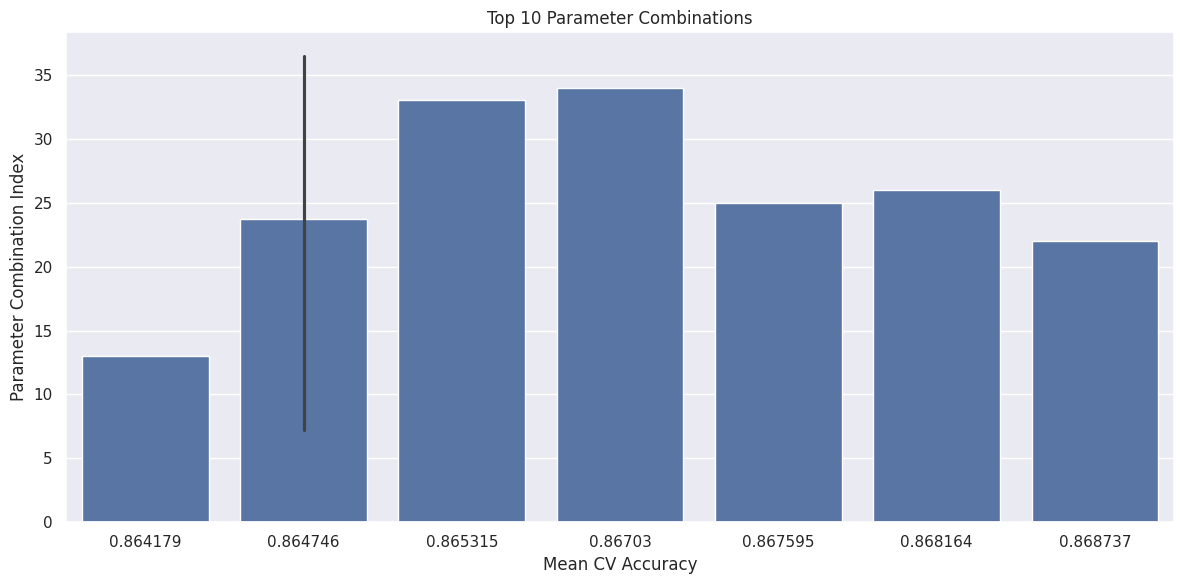

In [188]:

# Top parameters visualization
plt.figure(figsize=(12, 6))
top_results = results.sort_values('mean_test_score', ascending=False).head(10)
sns.barplot(x='mean_test_score', y=top_results.index, data=top_results)
plt.title('Top 10 Parameter Combinations')
plt.xlabel('Mean CV Accuracy')
plt.ylabel('Parameter Combination Index')
plt.tight_layout()
plt.show()

In [191]:
# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'subsample': 0.8, 'random_strength': 2.0, 'learning_rate': 0.009770099572992257, 'l2_leaf_reg': 7, 'depth': 6, 'colsample_bylevel': 1.0, 'bagging_temperature': 10}


In [194]:
# Get the best model directly
best_model = random_search.best_estimator_
best_model

In [195]:
# Get the best cross-validation score
best_score = random_search.best_score_
print(f"Best cross-validation score: {best_score:.4f}")

Best cross-validation score: 0.8687


In [196]:
# Evaluate the best model on test data
test_score = best_model.score(X_test, y_test)
print(f"Test accuracy with best parameters: {test_score:.4f}")

Test accuracy with best parameters: 0.8699


In [198]:
final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30, verbose=0)

In [200]:
y_test_predict = final_model.predict(X_test)

<Axes: >

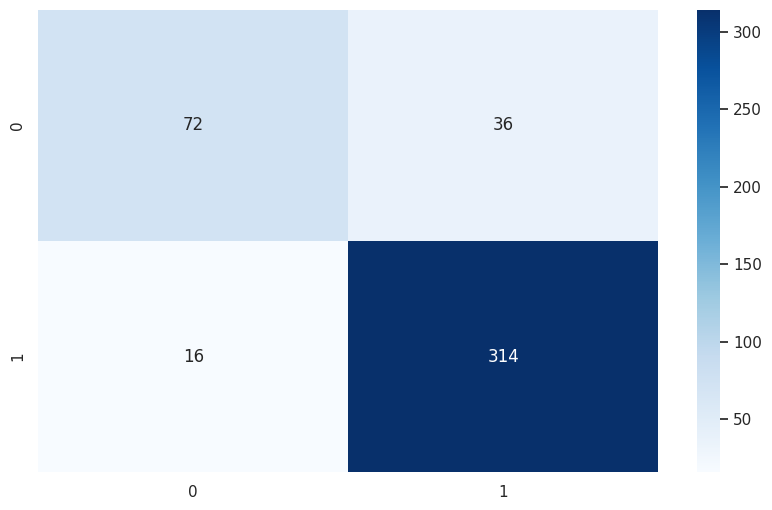

In [201]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='d', cmap='Blues')

# Predicting value for test dataset

In [247]:
test.head()

day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0    1    1019.5     17.5         15.8     12.7      14.9      96.0   99.0   
1    2    1016.5     17.5         16.5     15.8      15.1      97.0   99.0   
2    3    1023.9     11.2         10.4      9.4       8.9      86.0   96.0   
3    4    1022.9     20.6         17.3     15.2       9.5      75.0   45.0   
4    5    1022.2     16.1         13.8      6.4       4.3      68.0   49.0   

   sunshine  winddirection  windspeed  
0       0.0           50.0       24.3  
1       0.0           50.0       35.3  
2       0.0           40.0       16.9  
3       7.1           20.0       50.6  
4       9.2           20.0       19.4

In [251]:
test_predict = best_model.predict(test)

In [252]:
test_predict

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [255]:
test_dataset = pd.read_csv('test.csv')
test_dataset.head()

id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0  2190    1    1019.5     17.5         15.8     12.7      14.9      96.0   
1  2191    2    1016.5     17.5         16.5     15.8      15.1      97.0   
2  2192    3    1023.9     11.2         10.4      9.4       8.9      86.0   
3  2193    4    1022.9     20.6         17.3     15.2       9.5      75.0   
4  2194    5    1022.2     16.1         13.8      6.4       4.3      68.0   

   cloud  sunshine  winddirection  windspeed  
0   99.0       0.0           50.0       24.3  
1   99.0       0.0           50.0       35.3  
2   96.0       0.0           40.0       16.9  
3   45.0       7.1           20.0       50.6  
4   49.0       9.2           20.0       19.4

In [258]:
result = pd.DataFrame([test_dataset['id'], test_predict]).T

In [259]:
result

id  Unnamed 0
0    2190          1
1    2191          1
2    2192          1
3    2193          0
4    2194          0
..    ...        ...
725  2915          1
726  2916          1
727  2917          1
728  2918          1
729  2919          1

[730 rows x 2 columns]

In [260]:
result.to_csv('result.csv', index=False)